# Students ID

Student Name - Inês Honrado<br>
Student id - 20240559<br>
Contact e-mail - 20240559@novaims.unl.pt<br>

Student Name - Jude Gbenimako<br>
Student id - 20240700<br>
Contact e-mail - 20240700@novaims.unl.pt<br>

Student Name - Rúben Marques<br>
Student id - 20240352<br>
Contact e-mail - 20240352@novaims.unl.pt<br>

Student Name - Susana Reis<br>
Student id - 20240567<br>
Contact e-mail - 20240567@novaims.unl.pt<br>

Student Name - Tomás Carvalho<br>
Student id - 20240938<br>
Contact e-mail - 20240938@novaims.unl.pt<br>

# Import the Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

import joblib

# Context

Workers' compensation for workplace injuries in New York are administrated through the Workers' Compensation Board. Due to the fact that over 5 million claims have been processed since the year 2000, assessing claims manually is very time-consuming. The purpose of this project is to apply machine learning models, taking claims from 2020 to 2022, to conduct automated claim evaluations in order to seep up decision-making on new claims and increase WCB efficiency in handling compensation processes.

# Metadata

- **Accident Date**: Injury date of the claim.
- **Age at Injury**: Age of injured worker when the injury occurred.
- **Alternative Dispute Resolution**: Adjudication processes external to the Board.
- **Assembly Date**: The date the claim was first assembled.
- **Attorney/Representative**: Whether the claim is being represented by an attorney.
- **Average Weekly Wage**: The wage used to calculate workers’ compensation, disability, or paid leave wage replacement benefits.
- **Birth Year**: The reported year of birth of the injured worker.
- **C-2 Date**: Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).
- **C-3 Date**: Date Form C-3 (Employee Claim Form) was received.
- **Carrier Name**: Name of the primary insurance provider responsible for providing workers’ compensation coverage to the injured worker’s employer.
- **Carrier Type**: Type of primary insurance provider responsible for providing workers’ compensation coverage.
- **Claim Identifier**: Unique identifier for each claim, assigned by WCB.
- **County of Injury**: Name of the New York County where the injury occurred.
- **COVID-19 Indicator**: Indicates if the claim may be associated with COVID-19.
- **District Name**: Name of the WCB district office that oversees claims for that region or area of the state.
- **First Hearing Date**: Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing.
- **Gender**: The reported gender of the injured worker.
- **IME-4 Count**: Number of IME-4 forms received per claim. The IME-4 form is the "Independent Examiner's Report of Independent Medical Examination."
- **Industry Code**: NAICS code and descriptions are available at [NAICS Search](https://www.naics.com/search-naics-codes-by-industry/).
- **Industry Code Description**: 2-digit NAICS industry code description used to classify businesses according to their economic activity.
- **Medical Fee Region**: Approximate region where the injured worker would receive medical services.
- **OIICS Nature of Injury Description**: The OIICS nature of injury codes & descriptions are available at [BLS OIICS Manual](https://www.bls.gov/iif/oiics_manual_2007.pdf).
- **WCIO Cause of Injury Code**: The WCIO cause of injury codes & descriptions are available at [WCIO Cause Table](https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf).
- **WCIO Cause of Injury Description**: See description of field above.
- **WCIO Nature of Injury Code**: The WCIO nature of injury codes & descriptions are available at [WCIO Nature Table](https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf).
- **WCIO Nature of Injury Description**: See description of field above.
- **WCIO Part of Body Code**: The WCIO part of body codes & descriptions are available at [WCIO Part Table](https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf).
- **WCIO Part of Body Description**: See description of field above.
- **Zip Code**: The reported ZIP code of the injured worker’s home address.
- **Agreement Reached**: Binary variable: Yes if there is an agreement without the involvement of the WCB (unknown at the start of a claim).
- **WCB Decision**: Multiclass variable: Decision of the WCB relative to the claim: "Accident" means that the claim refers to a workplace accident; "Occupational Disease" means illness from the workplace; requires WCB deliberation, so it is unknown at the start of a claim.
- **Claim Injury Type**: Main target variable: Deliberation of the WCB relative to benefits awarded to the claim. Numbering indicates severity.

# Import the data

In [9]:
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')

# Initial Analysis

In [11]:
df_train.shape

(593471, 33)

We have 33 variables and 593471 observations.

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

The variable 'Claim Identifier' works has an ID, and is the perfect one to set as index.

In [15]:
keep_identifier = df_test['Claim Identifier'].copy()

In [16]:
df_train.set_index('Claim Identifier', inplace=True)
df_test.set_index('Claim Identifier', inplace=True)

**Checking duplicates:**

In [18]:
duplicates = df_train.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 18350


In [19]:
df_train = df_train.drop_duplicates()

In [20]:
duplicates = df_train.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


**Checking statistics:**

In [22]:
df_train.describe()

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,574025.000000,5.453740e+05,544947.000000,132803.000000,564068.000000,0.0,558386.000000,558369.000000,556944.000000,574025.000000,574025.000000
mean,42.114343,4.910892e+02,1886.767454,3.207337,58.645305,NaN,54.381143,41.013839,39.738146,0.046665,3.006564
std,14.256336,6.092924e+03,414.644789,2.832303,19.644175,NaN,25.874281,22.207521,22.365940,0.210921,2.000799
min,0.000000,0.000000e+00,0.000000,1.000000,11.000000,NaN,1.000000,1.000000,-9.000000,0.000000,0.000000
25%,31.000000,0.000000e+00,1965.000000,1.000000,45.000000,NaN,31.000000,16.000000,33.000000,0.000000,1.000000
50%,42.000000,0.000000e+00,1977.000000,2.000000,61.000000,NaN,56.000000,49.000000,38.000000,0.000000,3.000000
75%,54.000000,8.410000e+02,1989.000000,4.000000,71.000000,NaN,75.000000,52.000000,53.000000,0.000000,5.000000
max,117.000000,2.828079e+06,2018.000000,73.000000,92.000000,NaN,99.000000,91.000000,99.000000,1.000000,6.000000


**What we can observe:**
  - Values like 0 or 117 in 'Age at Injury', which indicate data errors.
  - There are a lot of 0 values in Average Weekly Wage.
  - The mean birth year is approximately 1886, which might be skewed by invalid entries such as 0.
  - The column 'OIICS Nature of Injury Description' is entirely missing, which might justify excluding it.
  - Given that most values in 'Agreement Reached' are zero, a large portion of claims may not have reached an agreement.

In [24]:
df_train.describe(include='object')

,Accident Date,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,...,District Name,First Hearing Date,Gender,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Description,WCIO Nature of Injury Description,WCIO Part Of Body Description,Zip Code,WCB Decision
count,570337,574025,575121,574025,559466,187244,574025,574025,574025,574025,...,574025,150797,574025,564068,574025,558386,558369,556944,545388,574025
unique,5539,3,1096,2,2475,1648,2046,8,8,63,...,8,1094,4,20,5,74,56,54,10060,1
top,2020-03-01,N,2020-03-06,N,2021-05-11,2021-04-21,STATE INSURANCE FUND,1A. PRIVATE,2. NON-COMP,SUFFOLK,...,NYC,2022-04-15,M,HEALTH CARE AND SOCIAL ASSISTANCE,IV,LIFTING,STRAIN OR TEAR,LOWER BACK AREA,11236,Not Work Related
freq,1245,571411,1414,392291,1847,350,111144,285367,291078,60430,...,270778,440,335217,114339,265981,46610,153373,51862,3302,574025


**Correlations:**

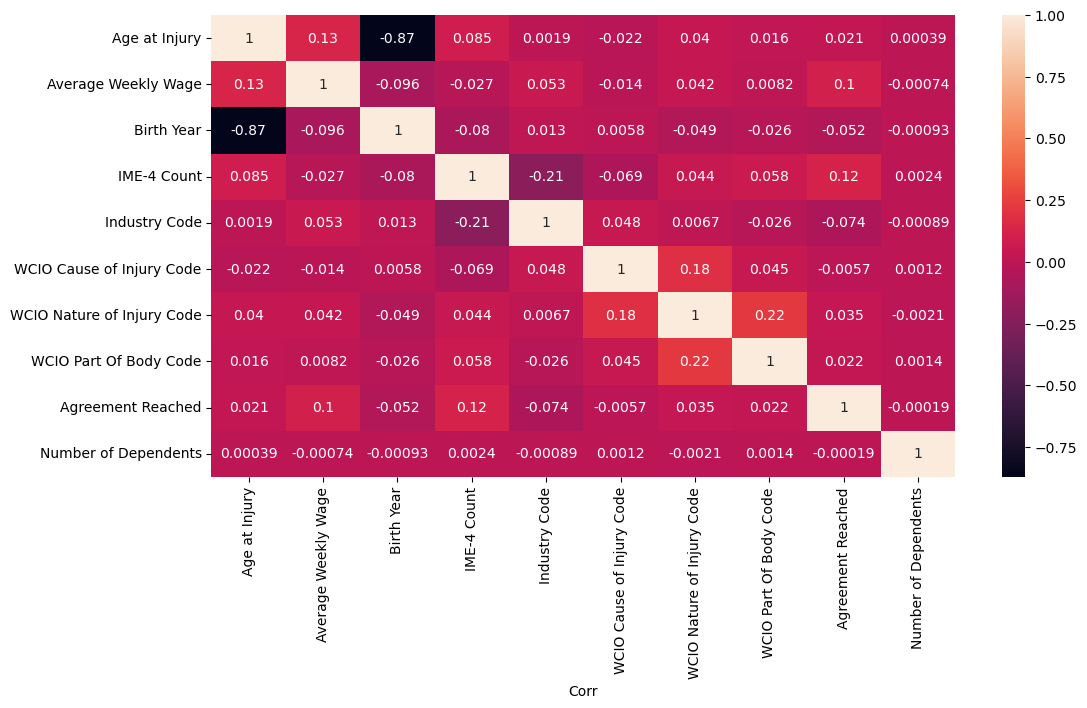

In [26]:
numerical_col = df_train.select_dtypes(include=['float64', 'int64']).columns

figure = plt.figure(figsize=(12, 6))
sns.heatmap(df_train[numerical_col].drop(columns = 'OIICS Nature of Injury Description').corr(method='spearman'), annot=True)

plt.xlabel('Corr')
plt.show()

There is a strong negative correlation between Age at Injury and Birth Year in the correlation heat map. This was expected since Birth Year and Age at Injury are intrinsically connected with one another -for each claim, Birth Year will be related to, and therefore determine, the Age at Injury.

In feature selection, based on this dependency, we would be better off removing one of these variables to avoid duplication and, consequently, any multicollinearity issues that might arise. 

# Clean and Pre-Process the Data

## Transform dates into datetime

In [30]:
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

for col in date_columns:
        df_train[col] = pd.to_datetime(df_train[col], errors='coerce')

for col in date_columns:
        df_test[col] = pd.to_datetime(df_test[col], errors='coerce')

## Drop null targets

In [32]:
df_train['Claim Injury Type'].isnull().sum()

1096

In [33]:
df_train.dropna(subset=['Claim Injury Type'], inplace=True)

## Split df_train

We split the dataset into training and validation sets using the **holdout method**. This will allow us to train the model on one portion of the data (the training set) and evaluate its performance on another (validation set).

- **test_size=0.2**: 20% of the data is used for validation, while 80% is used for training.
- **random_state=42**: This ensures reproducibility of the split across different runs.
- **stratify=y**: The split is done while preserving the distribution of the target variable (`y`) in both the training and validation sets.
- **shuffle=True**: The data is shuffled before splitting, preventing any potential bias from the ordering of the data.

In [36]:
target = 'Claim Injury Type'
X = df_train.drop(columns=[target])
y = df_train[target]

In [37]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y, 
    shuffle=True)

In [38]:
y_train.value_counts()

Claim Injury Type
2. NON-COMP        232862
4. TEMPORARY       118806
3. MED ONLY         55125
5. PPD SCH LOSS     38624
1. CANCELLED         9981
6. PPD NSL           3369
8. DEATH              376
7. PTD                 77
Name: count, dtype: int64

We have an imbalaced train data.

## Outliers

### Age at Injury

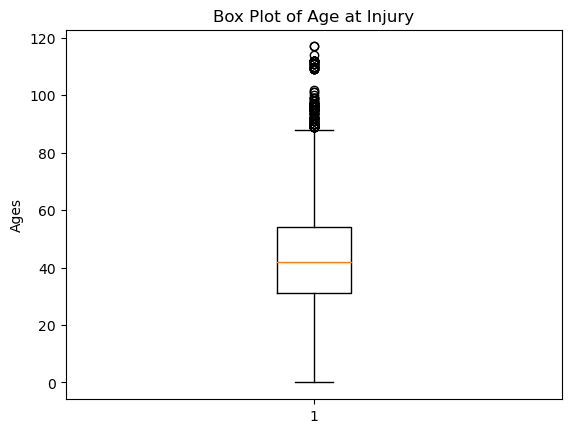

In [42]:
plt.boxplot(X_train['Age at Injury'])
plt.title('Box Plot of Age at Injury')
plt.ylabel('Ages')
plt.show()

In [43]:
print(X_train['Age at Injury'].describe())

Q1 = X_train['Age at Injury'].quantile(0.25)
Q3 = X_train['Age at Injury'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

outliers = X_train[(X_train['Age at Injury'] < lower_bound) | (X_train['Age at Injury'] > upper_bound)]
print(f'Number of Outliers: {outliers.shape[0]}')

count    459220.000000
mean         42.111306
std          14.264959
min           0.000000
25%          31.000000
50%          42.000000
75%          54.000000
max         117.000000
Name: Age at Injury, dtype: float64
Lower Bound: -3.5, Upper Bound: 88.5
Number of Outliers: 165


In the context of workplace, we should treat values below 16 and above 85 as outliers or invalid.

In [45]:
def clean_age_column(df, age_col='Age at Injury', min_age=16, max_age=85):

    df[age_col] = df[age_col].apply(lambda x: x if min_age <= x <= max_age else np.nan)
    df[age_col] = df[age_col].astype('Int64')
    
    return df

In [46]:
X_train = clean_age_column(X_train, age_col='Age at Injury', min_age=16, max_age=85)
X_val = clean_age_column(X_val, age_col='Age at Injury', min_age=16, max_age=85)

df_test = clean_age_column(df_test, age_col='Age at Injury', min_age=16, max_age=85)

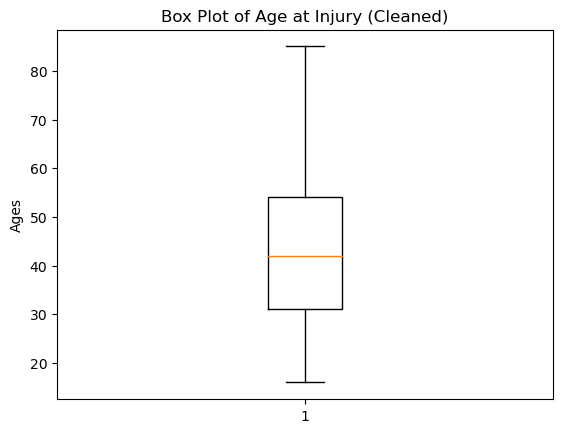

In [47]:
age_cleaned = X_train['Age at Injury'].dropna()
plt.boxplot(age_cleaned)
plt.title('Box Plot of Age at Injury (Cleaned)')
plt.ylabel('Ages')
plt.show()

### Average Weekly Wage

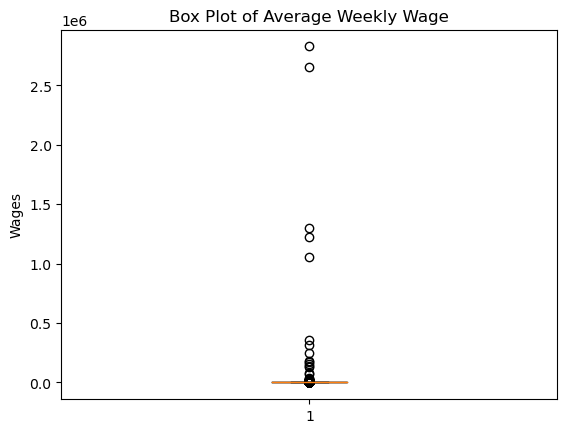

In [49]:
aww_cleaned = X_train['Average Weekly Wage'].dropna()
plt.boxplot(aww_cleaned)
plt.title('Box Plot of Average Weekly Wage')
plt.ylabel('Wages')
plt.show()

In [50]:
print(X_train['Average Weekly Wage'].describe())

Q1 = X_train['Average Weekly Wage'].quantile(0.25)
Q3 = X_train['Average Weekly Wage'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

outliers = X_train[(X_train['Average Weekly Wage'] < lower_bound) | (X_train['Average Weekly Wage'] > upper_bound)]
print(f'Number of Outliers: {outliers.shape[0]}')

count    4.362520e+05
mean     4.953600e+02
std      6.777520e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.433400e+02
max      2.828079e+06
Name: Average Weekly Wage, dtype: float64
Lower Bound: -1265.01, Upper Bound: 2108.35
Number of Outliers: 17711


In [51]:
print(X_train['Average Weekly Wage'].describe())

lower_percentile = X_train['Average Weekly Wage'].quantile(0.03)
upper_percentile = X_train['Average Weekly Wage'].quantile(0.97)

print(f'Lower Bound (2nd percentile): {lower_percentile}, Upper Bound (98th percentile): {upper_percentile}')

outliers = X_train[(X_train['Average Weekly Wage'] < lower_percentile) | (X_train['Average Weekly Wage'] > upper_percentile)]
print(f'Number of Outliers: {outliers.shape[0]}')

count    4.362520e+05
mean     4.953600e+02
std      6.777520e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.433400e+02
max      2.828079e+06
Name: Average Weekly Wage, dtype: float64
Lower Bound (2nd percentile): 0.0, Upper Bound (98th percentile): 2288.6793999999995
Number of Outliers: 13088


The 3rd and 97th percentile approach seems more resonable, and the bounds it sets make much more sense.

In [53]:
def clean_aww_column(df, aww_col='Average Weekly Wage', min_aww=0, max_aww=2288): 
    
    df[aww_col] = df[aww_col].apply(lambda x: x if min_aww < x <= max_aww else np.nan)
    
    return df

In [54]:
X_train = clean_aww_column(X_train, aww_col='Average Weekly Wage', min_aww=0, max_aww=2288)
X_val = clean_aww_column(X_val, aww_col='Average Weekly Wage', min_aww=0, max_aww=2288)
df_test = clean_aww_column(df_test, aww_col='Average Weekly Wage', min_aww=0, max_aww=2288)

In [55]:
print(X_train['Average Weekly Wage'].describe())

count    154999.000000
mean       1073.110295
std         508.399167
min          13.940000
25%         675.550000
50%        1002.120000
75%        1438.590000
max        2288.000000
Name: Average Weekly Wage, dtype: float64


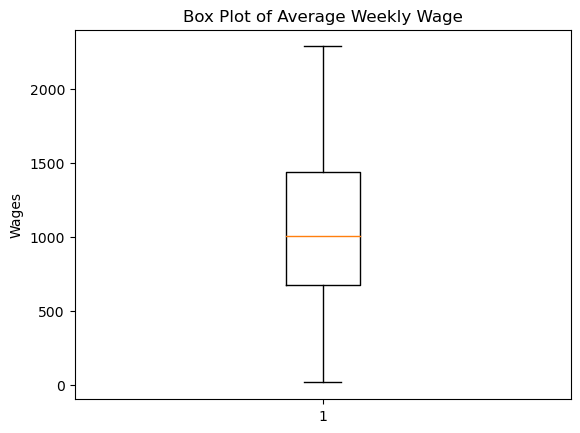

In [56]:
aww_cleaned = X_train['Average Weekly Wage'].dropna()
plt.boxplot(aww_cleaned)
plt.title('Box Plot of Average Weekly Wage')
plt.ylabel('Wages')
plt.show()

### Birth Year

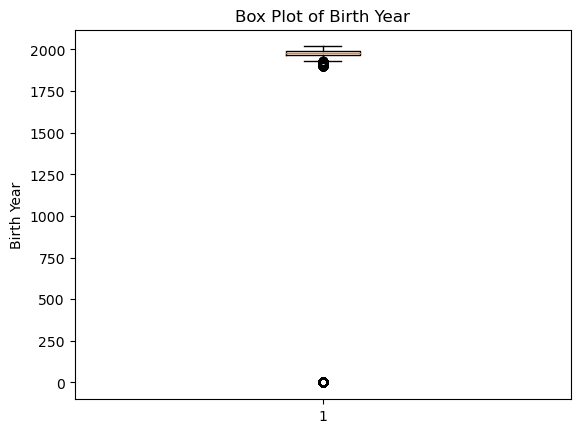

In [58]:
birth_year_cleaned = X_train['Birth Year'].dropna()

plt.boxplot(birth_year_cleaned)
plt.title('Box Plot of Birth Year')
plt.ylabel('Birth Year')
plt.show()

In [59]:
print(X_train['Birth Year'].describe())

Q1 = X_train['Birth Year'].quantile(0.25)
Q3 = X_train['Birth Year'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

outliers = X_train[(X_train['Birth Year'] < lower_bound) | (X_train['Birth Year'] > upper_bound)]
print(f'Number of Outliers: {outliers.shape[0]}')

count    436016.000000
mean       1886.537765
std         415.151658
min           0.000000
25%        1965.000000
50%        1977.000000
75%        1989.000000
max        2018.000000
Name: Birth Year, dtype: float64
Lower Bound: 1929.0, Upper Bound: 2025.0
Number of Outliers: 20319


In the context of workplace, we should treat ages below 16 and above 85 as outliers or invalid. So, birth years below 1939 (2024-85) or above 2008 (2024-16) should be considered outliers/invalid. 

In [61]:
def clean_birth_year_column(df, birth_year_col='Birth Year', min_year=1939, max_year=2008):

    df[birth_year_col] = df[birth_year_col].apply(lambda x: x if (pd.notna(x) and min_year <= x <= max_year) else np.nan)
    
    return df 

In [62]:
X_train = clean_birth_year_column(X_train, birth_year_col='Birth Year', min_year=1939, max_year=2008)
X_val = clean_birth_year_column(X_val, birth_year_col='Birth Year', min_year=1939, max_year=2008)
df_test = clean_birth_year_column(df_test, birth_year_col='Birth Year', min_year=1939, max_year=2008)

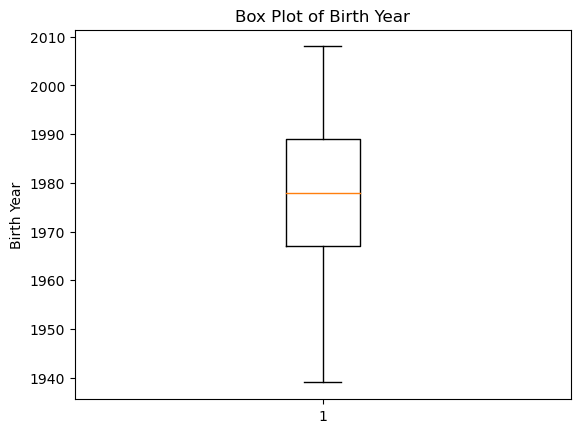

In [63]:
birth_year_cleaned = X_train['Birth Year'].dropna()

plt.boxplot(birth_year_cleaned)
plt.title('Box Plot of Birth Year')
plt.ylabel('Birth Year')
plt.show()

### IME-4 Count

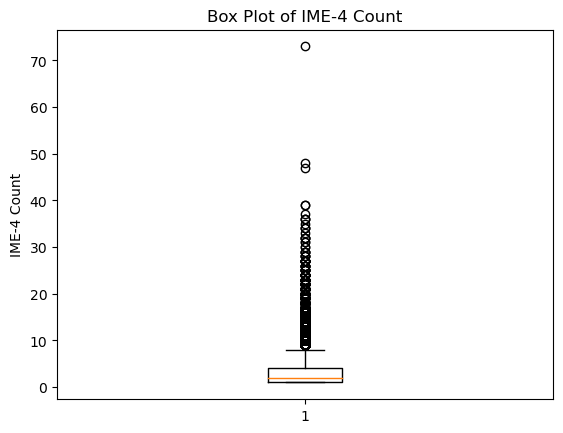

In [65]:
ime4_count_cleaned = X_train['IME-4 Count'].dropna()

plt.boxplot(ime4_count_cleaned)
plt.title('Box Plot of IME-4 Count')
plt.ylabel('IME-4 Count')
plt.show()

In [66]:
print(X_train['IME-4 Count'].describe())

Q1 = X_train['IME-4 Count'].quantile(0.25)
Q3 = X_train['IME-4 Count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

outliers = X_train[(X_train['IME-4 Count'] < lower_bound) | (X_train['IME-4 Count'] > upper_bound)]
print(f'Number of Outliers: {outliers.shape[0]}')

count    106210.000000
mean          3.208954
std           2.847020
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          73.000000
Name: IME-4 Count, dtype: float64
Lower Bound: -3.5, Upper Bound: 8.5
Number of Outliers: 5756


In [67]:
print(X_train['IME-4 Count'].describe())

lower_percentile = X_train['IME-4 Count'].quantile(0.03)
upper_percentile = X_train['IME-4 Count'].quantile(0.97)

print(f'Lower Bound (3rd percentile): {lower_percentile}, Upper Bound (97th percentile): {upper_percentile}')

outliers = X_train[(X_train['IME-4 Count'] < lower_percentile) | (X_train['IME-4 Count'] > upper_percentile)]

print(f'Number of Outliers: {outliers.shape[0]}')

count    106210.000000
mean          3.208954
std           2.847020
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          73.000000
Name: IME-4 Count, dtype: float64
Lower Bound (3rd percentile): 1.0, Upper Bound (97th percentile): 10.0
Number of Outliers: 3053


Again, the 3rd and 97th percentile approach seems more resonable, and the bounds it sets make much more sense.

In [69]:
def clean_ime4_count_column(df, ime4_count_col='IME-4 Count', min_value=1, max_value=10):

    df[ime4_count_col] = df[ime4_count_col].apply(lambda x: x if (pd.notna(x) and min_value <= x <= max_value) else np.nan)
    
    return df

In [70]:
X_train = clean_ime4_count_column(X_train, ime4_count_col='IME-4 Count')
X_val = clean_ime4_count_column(X_val, ime4_count_col='IME-4 Count')
df_test = clean_ime4_count_column(df_test, ime4_count_col='IME-4 Count')

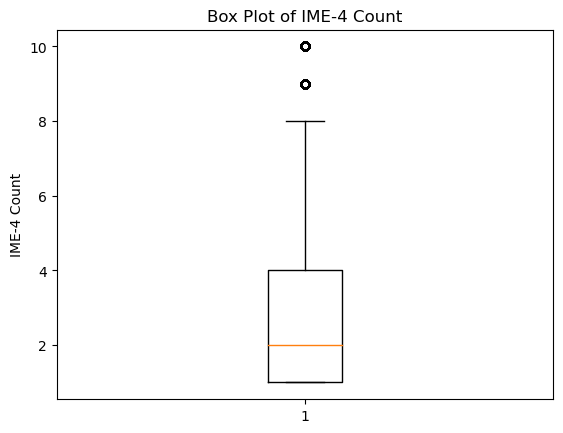

In [71]:
ime4_count_cleaned = X_train['IME-4 Count'].dropna()

plt.boxplot(ime4_count_cleaned)
plt.title('Box Plot of IME-4 Count')
plt.ylabel('IME-4 Count')
plt.show()

### Number of Dependents

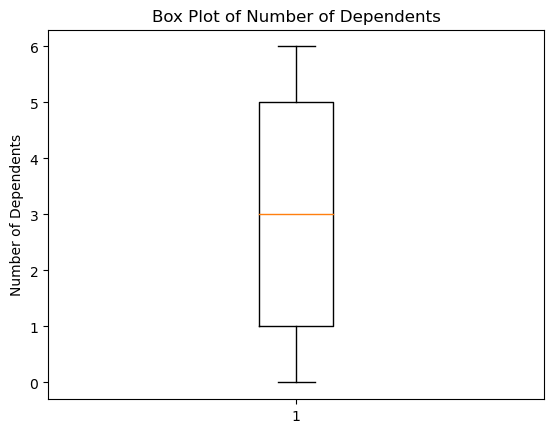

In [73]:
dependents_cleaned = X_train['Number of Dependents'].dropna()

plt.boxplot(dependents_cleaned)
plt.title('Box Plot of Number of Dependents')
plt.ylabel('Number of Dependents')
plt.show()

In [74]:
print(X_train['Number of Dependents'].describe())

Q1 = X_train['Number of Dependents'].quantile(0.25)
Q3 = X_train['Number of Dependents'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

outliers = X_train[(X_train['Number of Dependents'] < lower_bound) | (X_train['Number of Dependents'] > upper_bound)]
print(f'Number of Outliers: {outliers.shape[0]}')

count    459220.000000
mean          3.003952
std           2.000465
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: Number of Dependents, dtype: float64
Lower Bound: -5.0, Upper Bound: 11.0
Number of Outliers: 0


In [75]:
print(X_train['Number of Dependents'].describe())

lower_percentile = X_train['Number of Dependents'].quantile(0.03)
upper_percentile = X_train['Number of Dependents'].quantile(0.97)

print(f'Lower Bound (3rd percentile): {lower_percentile}, Upper Bound (97th percentile): {upper_percentile}')

outliers = X_train[(X_train['Number of Dependents'] < lower_percentile) | (X_train['Number of Dependents'] > upper_percentile)]

print(f'Number of Outliers: {outliers.shape[0]}')

count    459220.000000
mean          3.003952
std           2.000465
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: Number of Dependents, dtype: float64
Lower Bound (3rd percentile): 0.0, Upper Bound (97th percentile): 6.0
Number of Outliers: 0


There are no outliers.

### Accident Date

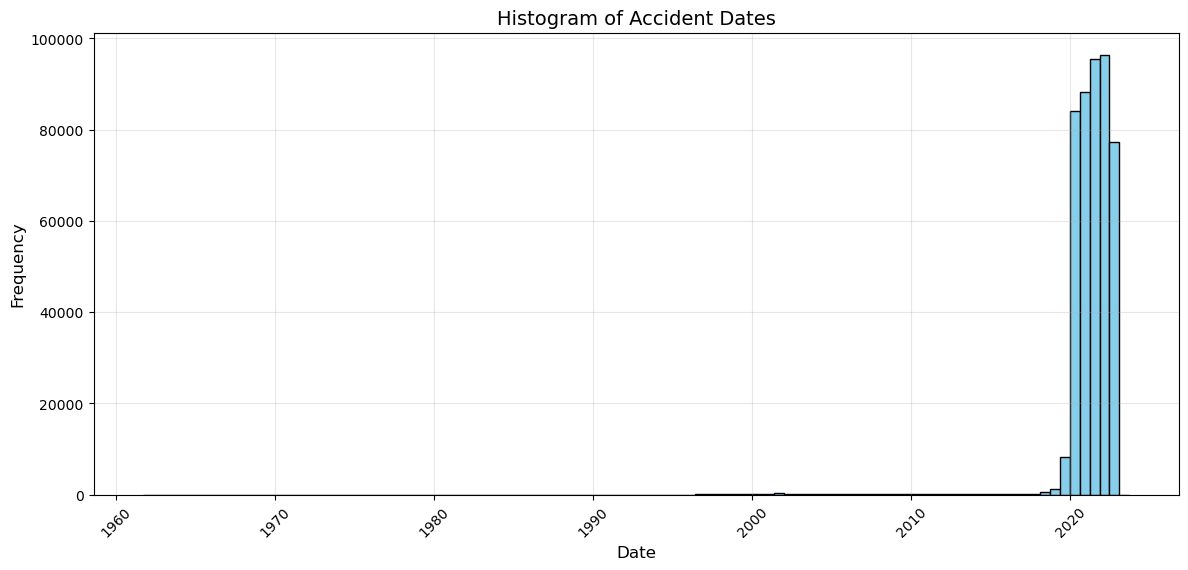

In [78]:
plt.figure(figsize=(14, 6))
plt.hist(X_train['Accident Date'], bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of Accident Dates', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(alpha=0.3)
plt.show()

In [79]:
print(X_train['Accident Date'].describe())

Q1 = X_train['Accident Date'].quantile(0.25)
Q3 = X_train['Accident Date'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

outliers = X_train[(X_train['Accident Date'] < lower_bound) | (X_train['Accident Date'] > upper_bound)]
print(f'Number of Outliers: {outliers.shape[0]}')

count                           456261
mean     2021-04-28 22:38:50.660740608
min                1961-09-06 00:00:00
25%                2020-09-14 00:00:00
50%                2021-06-27 00:00:00
75%                2022-03-22 00:00:00
max                2023-09-11 00:00:00
Name: Accident Date, dtype: object
Lower Bound: 2018-06-06 00:00:00, Upper Bound: 2024-06-30 00:00:00
Number of Outliers: 4546


In [80]:
print(X_train['Accident Date'].describe())

lower_percentile = X_train['Accident Date'].quantile(0.01)
upper_percentile = X_train['Accident Date'].quantile(0.99)

print(f'Lower Bound (1st percentile): {lower_percentile}, Upper Bound (99th percentile): {upper_percentile}')

outliers = X_train[(X_train['Accident Date'] < lower_percentile) | (X_train['Accident Date'] > upper_percentile)]

print(f'Number of Outliers: {outliers.shape[0]}')

count                           456261
mean     2021-04-28 22:38:50.660740608
min                1961-09-06 00:00:00
25%                2020-09-14 00:00:00
50%                2021-06-27 00:00:00
75%                2022-03-22 00:00:00
max                2023-09-11 00:00:00
Name: Accident Date, dtype: object
Lower Bound (1st percentile): 2018-06-11 14:24:00, Upper Bound (99th percentile): 2022-12-07 00:00:00
Number of Outliers: 9082


In [81]:
def clean_accident_date_column(df, lower_percentile, upper_percentile, accident_date_col='Accident Date'):

    df[accident_date_col] = df[accident_date_col].apply(lambda x: x if (pd.notna(x) and lower_percentile <= x <= upper_percentile) else np.nan)
    
    return df

In [82]:
X_train = clean_accident_date_column(X_train, lower_percentile, upper_percentile, accident_date_col='Accident Date')
X_val = clean_accident_date_column(X_val, lower_percentile, upper_percentile, accident_date_col='Accident Date')

In [83]:
X_train['Accident Date'].describe()

count                           447179
mean     2021-06-13 02:51:52.648849920
min                2018-06-12 00:00:00
25%                2020-09-20 00:00:00
50%                2021-06-27 00:00:00
75%                2022-03-16 00:00:00
max                2022-12-07 00:00:00
Name: Accident Date, dtype: object

### Assembly Date

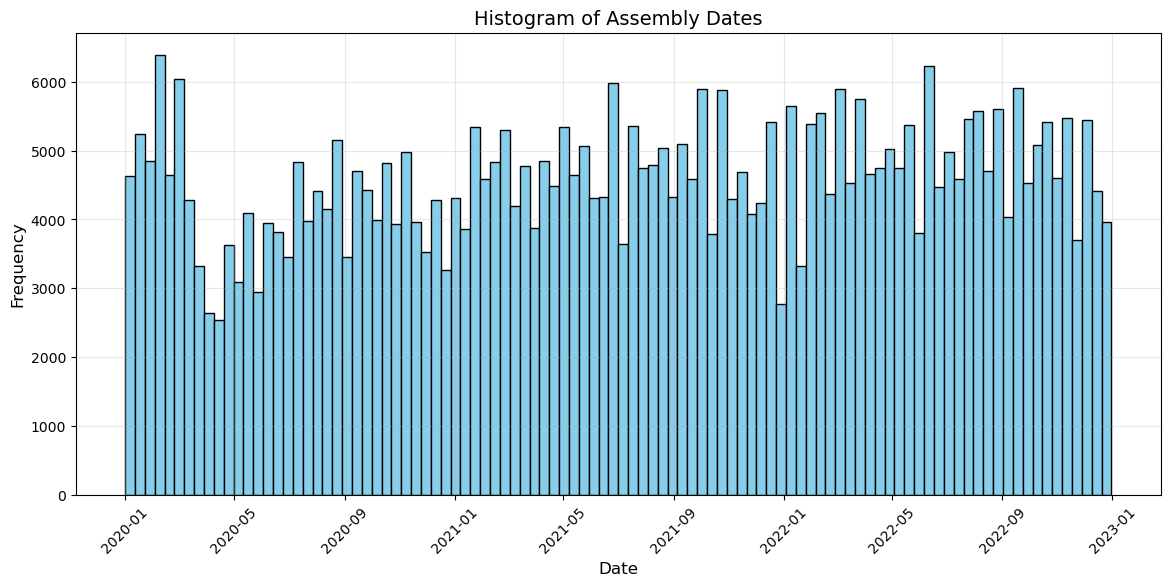

In [85]:
plt.figure(figsize=(14, 6))
plt.hist(X_train['Assembly Date'], bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of Assembly Dates', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(alpha=0.3)
plt.show()

In [86]:
print(X_train['Assembly Date'].describe())

Q1 = X_train['Assembly Date'].quantile(0.25)
Q3 = X_train['Assembly Date'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

outliers = X_train[(X_train['Assembly Date'] < lower_bound) | (X_train['Assembly Date'] > upper_bound)]
print(f'Number of Outliers: {outliers.shape[0]}')

count                           459220
mean     2021-07-19 18:46:13.823439616
min                2020-01-01 00:00:00
25%                2020-10-27 00:00:00
50%                2021-07-30 00:00:00
75%                2022-04-20 00:00:00
max                2022-12-31 00:00:00
Name: Assembly Date, dtype: object
Lower Bound: 2018-08-09 00:00:00, Upper Bound: 2024-07-08 00:00:00
Number of Outliers: 0


In [87]:
print(X_train['Assembly Date'].describe())

lower_percentile = X_train['Assembly Date'].quantile(0.01)
upper_percentile = X_train['Assembly Date'].quantile(0.99)

print(f'Lower Bound (1st percentile): {lower_percentile}, Upper Bound (99th percentile): {upper_percentile}')

outliers = X_train[(X_train['Assembly Date'] < lower_percentile) | (X_train['Assembly Date'] > upper_percentile)]

print(f'Number of Outliers: {outliers.shape[0]}')

count                           459220
mean     2021-07-19 18:46:13.823439616
min                2020-01-01 00:00:00
25%                2020-10-27 00:00:00
50%                2021-07-30 00:00:00
75%                2022-04-20 00:00:00
max                2022-12-31 00:00:00
Name: Assembly Date, dtype: object
Lower Bound (1st percentile): 2020-01-10 00:00:00, Upper Bound (99th percentile): 2022-12-19 00:00:00
Number of Outliers: 8414


In [88]:
def clean_assembly_date_column(df, lower_percentile, upper_percentile, assembly_date_col='Assembly Date'):

    df[assembly_date_col] = df[assembly_date_col].apply(lambda x: x if (pd.notna(x) and lower_percentile <= x <= upper_percentile) else np.nan)
    
    return df

In [89]:
X_train = clean_assembly_date_column(X_train, lower_percentile, upper_percentile, assembly_date_col='Assembly Date')
X_val = clean_assembly_date_column(X_val, lower_percentile, upper_percentile, assembly_date_col='Assembly Date')

In [90]:
X_train['Assembly Date'].describe()

count                           450806
mean     2021-07-19 08:53:15.364746752
min                2020-01-10 00:00:00
25%                2020-10-31 00:00:00
50%                2021-07-30 00:00:00
75%                2022-04-13 00:00:00
max                2022-12-19 00:00:00
Name: Assembly Date, dtype: object

### C-2 Date

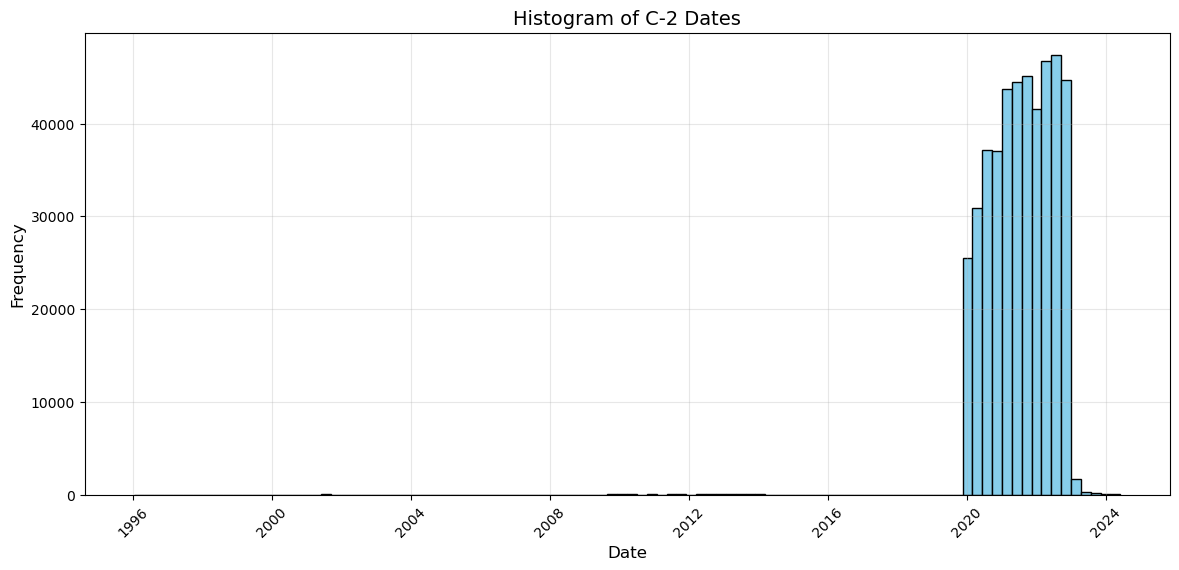

In [92]:
plt.figure(figsize=(14, 6))
plt.hist(X_train['C-2 Date'], bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of C-2 Dates', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(alpha=0.3)
plt.show()

In [93]:
print(X_train['C-2 Date'].describe())

Q1 = X_train['C-2 Date'].quantile(0.25)
Q3 = X_train['C-2 Date'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

outliers = X_train[(X_train['C-2 Date'] < lower_bound) | (X_train['C-2 Date'] > upper_bound)]
print(f'Number of Outliers: {outliers.shape[0]}')

count                           447630
mean     2021-07-16 20:01:08.713893376
min                1996-01-12 00:00:00
25%                2020-11-06 00:00:00
50%                2021-08-09 00:00:00
75%                2022-04-27 00:00:00
max                2024-05-31 00:00:00
Name: C-2 Date, dtype: object
Lower Bound: 2018-08-23 12:00:00, Upper Bound: 2024-07-10 12:00:00
Number of Outliers: 984


In [94]:
print(X_train['C-2 Date'].describe())

lower_percentile = X_train['C-2 Date'].quantile(0.01)
upper_percentile = X_train['C-2 Date'].quantile(0.99)

print(f'Lower Bound (1st percentile): {lower_percentile}, Upper Bound (99th percentile): {upper_percentile}')

outliers = X_train[(X_train['C-2 Date'] < lower_percentile) | (X_train['C-2 Date'] > upper_percentile)]

print(f'Number of Outliers: {outliers.shape[0]}')

count                           447630
mean     2021-07-16 20:01:08.713893376
min                1996-01-12 00:00:00
25%                2020-11-06 00:00:00
50%                2021-08-09 00:00:00
75%                2022-04-27 00:00:00
max                2024-05-31 00:00:00
Name: C-2 Date, dtype: object
Lower Bound (1st percentile): 2020-01-09 00:00:00, Upper Bound (99th percentile): 2022-12-22 00:00:00
Number of Outliers: 8338


In [95]:
def clean_c2_date_column(df, lower_percentile, upper_percentile, c2_date_col='C-2 Date'):
    
    df[c2_date_col] = df[c2_date_col].apply(lambda x: x if (pd.notna(x) and lower_percentile <= x <= upper_percentile) else np.nan)
    
    return df

In [96]:
X_train = clean_c2_date_column(X_train, lower_percentile, upper_percentile, c2_date_col='C-2 Date')
X_val = clean_c2_date_column(X_val, lower_percentile, upper_percentile, c2_date_col='C-2 Date')

In [97]:
X_train['C-2 Date'].describe()

count                           439292
mean     2021-07-26 09:24:02.746965248
min                2020-01-09 00:00:00
25%                2020-11-11 00:00:00
50%                2021-08-06 00:00:00
75%                2022-04-21 00:00:00
max                2022-12-22 00:00:00
Name: C-2 Date, dtype: object

### C-3 Date

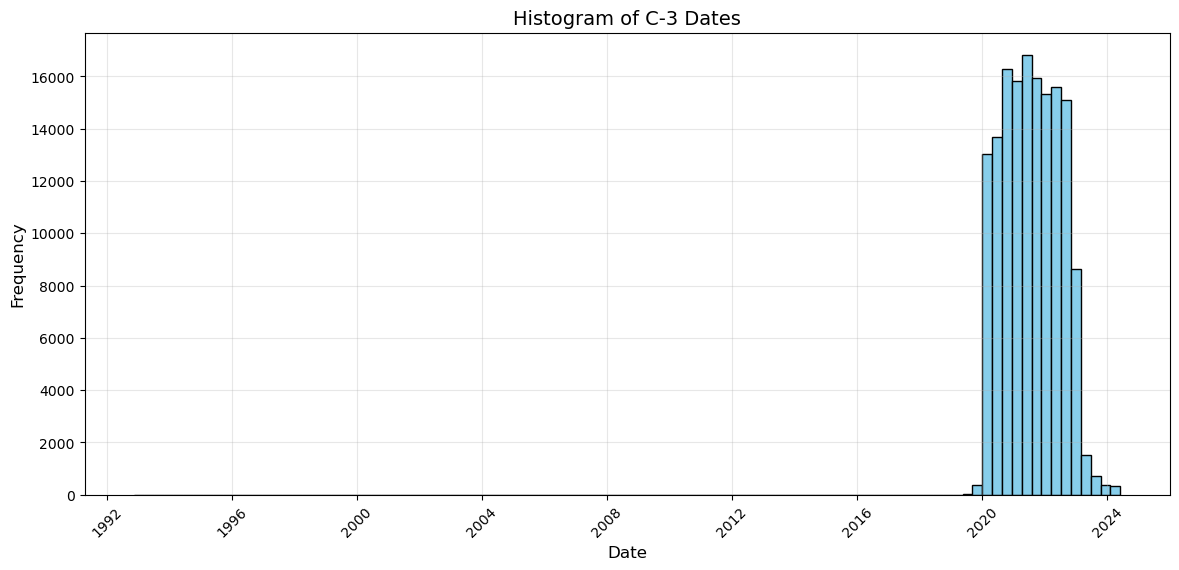

In [99]:
plt.figure(figsize=(14, 6))
plt.hist(X_train['C-3 Date'], bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of C-3 Dates', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(alpha=0.3)
plt.show()

In [100]:
print(X_train['C-3 Date'].describe())

Q1 = X_train['C-3 Date'].quantile(0.25)
Q3 = X_train['C-3 Date'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

outliers = X_train[(X_train['C-3 Date'] < lower_bound) | (X_train['C-3 Date'] > upper_bound)]
print(f'Number of Outliers: {outliers.shape[0]}')

count                           149629
mean     2021-07-26 22:13:27.292704256
min                1992-11-13 00:00:00
25%                2020-10-27 00:00:00
50%                2021-07-21 00:00:00
75%                2022-04-20 00:00:00
max                2024-05-31 00:00:00
Name: C-3 Date, dtype: object
Lower Bound: 2018-08-09 00:00:00, Upper Bound: 2024-07-08 00:00:00
Number of Outliers: 28


In [101]:
print(X_train['C-3 Date'].describe())

lower_percentile = X_train['C-3 Date'].quantile(0.005)
upper_percentile = X_train['C-3 Date'].quantile(0.995)

print(f'Lower Bound (0.5th percentile): {lower_percentile}, Upper Bound (99.5th percentile): {upper_percentile}')

outliers = X_train[(X_train['C-3 Date'] < lower_percentile) | (X_train['C-3 Date'] > upper_percentile)]

print(f'Number of Outliers: {outliers.shape[0]}')

count                           149629
mean     2021-07-26 22:13:27.292704256
min                1992-11-13 00:00:00
25%                2020-10-27 00:00:00
50%                2021-07-21 00:00:00
75%                2022-04-20 00:00:00
max                2024-05-31 00:00:00
Name: C-3 Date, dtype: object
Lower Bound (0.5th percentile): 2020-01-06 00:00:00, Upper Bound (99.5th percentile): 2023-10-09 00:00:00
Number of Outliers: 1456


In [102]:
def clean_c3_date_column(df, lower_percentile, upper_percentile, c3_date_col='C-3 Date'):

    df[c3_date_col] = df[c3_date_col].apply(lambda x: x if (pd.notna(x) and lower_percentile <= x <= upper_percentile) else np.nan)
    
    return df

In [103]:
X_train = clean_c3_date_column(X_train, lower_percentile, upper_percentile, c3_date_col='C-3 Date')
X_val = clean_c3_date_column(X_val, lower_percentile, upper_percentile, c3_date_col='C-3 Date')

In [104]:
X_train['C-3 Date'].describe()

count                           148173
mean     2021-07-25 12:19:47.487598592
min                2020-01-06 00:00:00
25%                2020-10-29 00:00:00
50%                2021-07-21 00:00:00
75%                2022-04-18 00:00:00
max                2023-10-09 00:00:00
Name: C-3 Date, dtype: object

### First Hearing Date

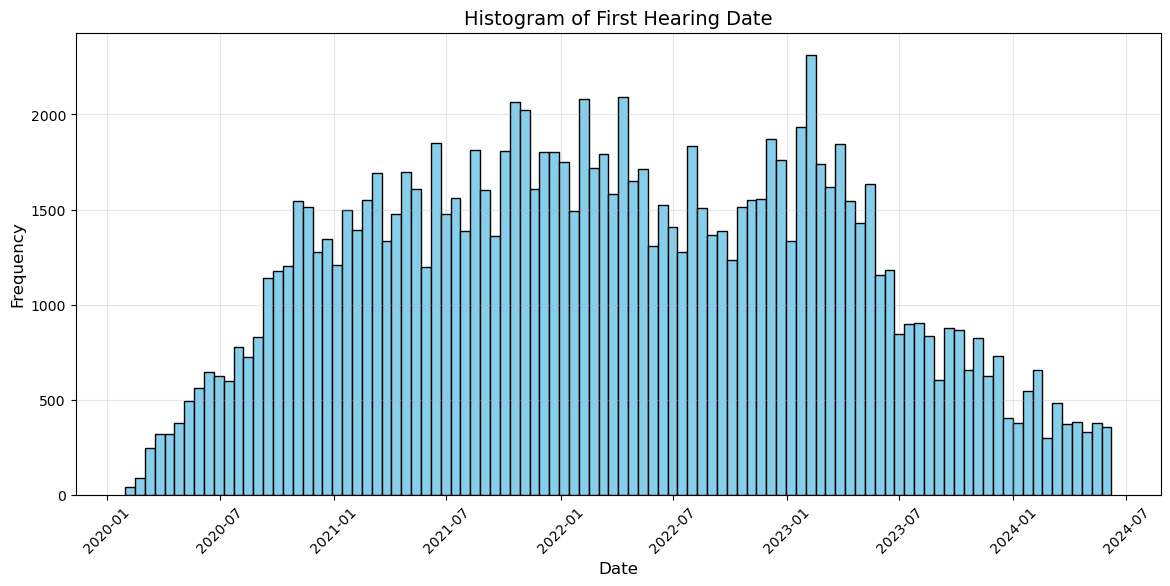

In [106]:
plt.figure(figsize=(14, 6))
plt.hist(X_train['First Hearing Date'], bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of First Hearing Date', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(alpha=0.3)
plt.show()

In [107]:
print(X_train['First Hearing Date'].describe())

Q1 = X_train['First Hearing Date'].quantile(0.25)
Q3 = X_train['First Hearing Date'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

outliers = X_train[(X_train['First Hearing Date'] < lower_bound) | (X_train['First Hearing Date'] > upper_bound)]
print(f'Number of Outliers: {outliers.shape[0]}')

count                           120571
mean     2022-03-19 06:45:03.157474816
min                2020-01-30 00:00:00
25%                2021-06-01 00:00:00
50%                2022-03-09 00:00:00
75%                2023-01-11 00:00:00
max                2024-06-07 00:00:00
Name: First Hearing Date, dtype: object
Lower Bound: 2018-12-30 12:00:00, Upper Bound: 2025-06-12 12:00:00
Number of Outliers: 0


In [108]:
print(X_train['First Hearing Date'].describe())

lower_percentile = X_train['First Hearing Date'].quantile(0.01)
upper_percentile = X_train['First Hearing Date'].quantile(0.99)

print(f'Lower Bound (1st percentile): {lower_percentile}, Upper Bound (99th percentile): {upper_percentile}')

outliers = X_train[(X_train['First Hearing Date'] < lower_percentile) | (X_train['First Hearing Date'] > upper_percentile)]

print(f'Number of Outliers: {outliers.shape[0]}')

count                           120571
mean     2022-03-19 06:45:03.157474816
min                2020-01-30 00:00:00
25%                2021-06-01 00:00:00
50%                2022-03-09 00:00:00
75%                2023-01-11 00:00:00
max                2024-06-07 00:00:00
Name: First Hearing Date, dtype: object
Lower Bound (1st percentile): 2020-04-27 00:00:00, Upper Bound (99th percentile): 2024-04-15 00:00:00
Number of Outliers: 2364


In [109]:
def clean_first_hearing_date_column(df, lower_percentile, upper_percentile, hearing_date_col='First Hearing Date'):
    df[hearing_date_col] = df[hearing_date_col].apply(
        lambda x: x if (pd.notna(x) and lower_percentile <= x <= upper_percentile) else np.nan
    )
    return df

In [110]:
X_train = clean_first_hearing_date_column(X_train, lower_percentile, upper_percentile, hearing_date_col='First Hearing Date')
X_val = clean_first_hearing_date_column(X_val, lower_percentile, upper_percentile, hearing_date_col='First Hearing Date')

In [111]:
X_train['First Hearing Date'].describe()

count                           118207
mean     2022-03-18 11:40:39.662626304
min                2020-04-27 00:00:00
25%                2021-06-07 00:00:00
50%                2022-03-09 00:00:00
75%                2023-01-05 00:00:00
max                2024-04-15 00:00:00
Name: First Hearing Date, dtype: object

## Dropping 'Description' Variables

There are several variables in the dataset that contain both a 'code' and a 'description' representing the same information. To facilitate our analysis and reduce redundancy, we will store the descriptions in dictionaries, mapping each code to its corresponding description. Afterward, we will drop the description variables from the dataset to simplify the data structure and focus on the essential information for our analysis.

In [114]:
industry_Code_train = X_train[['Industry Code', 'Industry Code Description']]
industry_Code_train = industry_Code_train.sort_values('Industry Code')
industry_Code_dict_train = industry_Code_train.set_index('Industry Code')['Industry Code Description'].dropna().to_dict()

industry_Code_dict_train

{11.0: 'AGRICULTURE, FORESTRY, FISHING AND HUNTING',
 21.0: 'MINING',
 22.0: 'UTILITIES',
 23.0: 'CONSTRUCTION',
 31.0: 'MANUFACTURING',
 32.0: 'MANUFACTURING',
 33.0: 'MANUFACTURING',
 42.0: 'WHOLESALE TRADE',
 44.0: 'RETAIL TRADE',
 45.0: 'RETAIL TRADE',
 48.0: 'TRANSPORTATION AND WAREHOUSING',
 49.0: 'TRANSPORTATION AND WAREHOUSING',
 51.0: 'INFORMATION',
 52.0: 'FINANCE AND INSURANCE',
 53.0: 'REAL ESTATE AND RENTAL AND LEASING',
 54.0: 'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES',
 55.0: 'MANAGEMENT OF COMPANIES AND ENTERPRISES',
 56.0: 'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT',
 61.0: 'EDUCATIONAL SERVICES',
 62.0: 'HEALTH CARE AND SOCIAL ASSISTANCE',
 71.0: 'ARTS, ENTERTAINMENT, AND RECREATION',
 72.0: 'ACCOMMODATION AND FOOD SERVICES',
 81.0: 'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)',
 92.0: 'PUBLIC ADMINISTRATION'}

In [115]:
WCIO_Cause_Injury = X_train[['WCIO Cause of Injury Code' , 'WCIO Cause of Injury Description']] 
WCIO_Cause_Injury = WCIO_Cause_Injury.sort_values('WCIO Cause of Injury Code')
WCIO_Cause_Injury_dict = WCIO_Cause_Injury.set_index('WCIO Cause of Injury Code')['WCIO Cause of Injury Description'].dropna().to_dict()

WCIO_Cause_Injury_dict

{1.0: 'CHEMICALS',
 2.0: 'HOT OBJECTS OR SUBSTANCES',
 3.0: 'TEMPERATURE EXTREMES',
 4.0: 'FIRE OR FLAME',
 5.0: 'STEAM OR HOT FLUIDS',
 6.0: 'DUST, GASES, FUMES OR VAPORS',
 7.0: 'WELDING OPERATION',
 8.0: 'RADIATION',
 9.0: 'CONTACT WITH, NOC',
 10.0: 'MACHINE OR MACHINERY',
 11.0: 'COLD OBJECTS OR SUBSTANCES',
 12.0: 'OBJECT HANDLED',
 13.0: 'CAUGHT IN, UNDER OR BETWEEN, NOC',
 14.0: 'ABNORMAL AIR PRESSURE',
 15.0: 'BROKEN GLASS',
 16.0: 'HAND TOOL, UTENSIL; NOT POWERED',
 17.0: 'OBJECT BEING LIFTED OR HANDLED',
 18.0: 'POWERED HAND TOOL, APPLIANCE',
 19.0: 'CUT, PUNCTURE, SCRAPE, NOC',
 20.0: 'COLLAPSING MATERIALS (SLIDES OF EARTH)',
 25.0: 'FROM DIFFERENT LEVEL (ELEVATION)',
 26.0: 'FROM LADDER OR SCAFFOLDING',
 27.0: 'FROM LIQUID OR GREASE SPILLS',
 28.0: 'INTO OPENINGS',
 29.0: 'ON SAME LEVEL',
 30.0: 'SLIP, OR TRIP, DID NOT FALL',
 31.0: 'FALL, SLIP OR TRIP, NOC',
 32.0: 'ON ICE OR SNOW',
 33.0: 'ON STAIRS',
 40.0: 'CRASH OF WATER VEHICLE',
 41.0: 'CRASH OF RAIL VEHICLE',
 45.0

In [116]:
WCIO_Nature_Injury = X_train[['WCIO Nature of Injury Code' , 'WCIO Nature of Injury Description']] 
WCIO_Nature_Injury = WCIO_Nature_Injury.sort_values('WCIO Nature of Injury Code')
WCIO_Nature_Injury_dict = WCIO_Nature_Injury.set_index('WCIO Nature of Injury Code')['WCIO Nature of Injury Description'].dropna().to_dict()

WCIO_Nature_Injury_dict

{1.0: 'NO PHYSICAL INJURY',
 2.0: 'AMPUTATION',
 3.0: 'ANGINA PECTORIS',
 4.0: 'BURN',
 7.0: 'CONCUSSION',
 10.0: 'CONTUSION',
 13.0: 'CRUSHING',
 16.0: 'DISLOCATION',
 19.0: 'ELECTRIC SHOCK',
 22.0: 'ENUCLEATION',
 25.0: 'FOREIGN BODY',
 28.0: 'FRACTURE',
 30.0: 'FREEZING',
 31.0: 'HEARING LOSS OR IMPAIRMENT',
 32.0: 'HEAT PROSTRATION',
 34.0: 'HERNIA',
 36.0: 'INFECTION',
 37.0: 'INFLAMMATION',
 38.0: 'ADVERSE REACTION TO A VACCINATION OR INOCULATION',
 40.0: 'LACERATION',
 41.0: 'MYOCARDIAL INFARCTION',
 42.0: 'POISONING - GENERAL (NOT OD OR CUMULATIVE',
 43.0: 'PUNCTURE',
 46.0: 'RUPTURE',
 47.0: 'SEVERANCE',
 49.0: 'SPRAIN OR TEAR',
 52.0: 'STRAIN OR TEAR',
 53.0: 'SYNCOPE',
 54.0: 'ASPHYXIATION',
 55.0: 'VASCULAR',
 58.0: 'VISION LOSS',
 59.0: 'ALL OTHER SPECIFIC INJURIES, NOC',
 60.0: 'DUST DISEASE, NOC',
 61.0: 'ASBESTOSIS',
 62.0: 'BLACK LUNG',
 63.0: 'BYSSINOSIS',
 64.0: 'SILICOSIS',
 65.0: 'RESPIRATORY DISORDERS',
 66.0: 'POISONING - CHEMICAL, (OTHER THAN METALS)',
 67.0: 'P

In [117]:
WCIO_Part_of_Body = X_train[['WCIO Part Of Body Code' , 'WCIO Part Of Body Description']] 
WCIO_Part_of_Body = WCIO_Part_of_Body.sort_values('WCIO Part Of Body Code')
WCIO_Part_of_Body_dict = WCIO_Part_of_Body.set_index('WCIO Part Of Body Code')['WCIO Part Of Body Description'].dropna().to_dict()

WCIO_Part_of_Body_dict

{-9.0: 'MULTIPLE',
 10.0: 'MULTIPLE HEAD INJURY',
 11.0: 'SKULL',
 12.0: 'BRAIN',
 13.0: 'EAR(S)',
 14.0: 'EYE(S)',
 15.0: 'NOSE',
 16.0: 'TEETH',
 17.0: 'MOUTH',
 18.0: 'SOFT TISSUE',
 19.0: 'FACIAL BONES',
 20.0: 'MULTIPLE NECK INJURY',
 21.0: 'VERTEBRAE',
 22.0: 'DISC',
 23.0: 'SPINAL CORD',
 24.0: 'LARYNX',
 25.0: 'SOFT TISSUE',
 26.0: 'TRACHEA',
 30.0: 'MULTIPLE UPPER EXTREMITIES',
 31.0: 'UPPER ARM',
 32.0: 'ELBOW',
 33.0: 'LOWER ARM',
 34.0: 'WRIST',
 35.0: 'HAND',
 36.0: 'FINGER(S)',
 37.0: 'THUMB',
 38.0: 'SHOULDER(S)',
 39.0: 'WRIST (S) & HAND(S)',
 40.0: 'MULTIPLE TRUNK',
 41.0: 'UPPER BACK AREA',
 42.0: 'LOWER BACK AREA',
 43.0: 'DISC',
 44.0: 'CHEST',
 45.0: 'SACRUM AND COCCYX',
 46.0: 'PELVIS',
 47.0: 'SPINAL CORD',
 48.0: 'INTERNAL ORGANS',
 49.0: 'HEART',
 50.0: 'MULTIPLE LOWER EXTREMITIES',
 51.0: 'HIP',
 52.0: 'UPPER LEG',
 53.0: 'KNEE',
 54.0: 'LOWER LEG',
 55.0: 'ANKLE',
 56.0: 'FOOT',
 57.0: 'TOES',
 58.0: 'GREAT TOE',
 60.0: 'LUNGS',
 61.0: 'ABDOMEN INCLUDING GROI

In [118]:
X_train = X_train.drop(['WCIO Part Of Body Description', 'WCIO Nature of Injury Description', 
                        'WCIO Cause of Injury Description', 'Industry Code Description'], axis=1)

X_val = X_val.drop(['WCIO Part Of Body Description', 'WCIO Nature of Injury Description', 
                    'WCIO Cause of Injury Description', 'Industry Code Description'], axis=1)

df_test = df_test.drop(['WCIO Part Of Body Description', 'WCIO Nature of Injury Description', 
                        'WCIO Cause of Injury Description', 'Industry Code Description'], axis=1)

## Missing Values

In [120]:
X_train.isnull().mean()

Accident Date                         0.026221
Age at Injury                         0.010370
Alternative Dispute Resolution        0.000000
Assembly Date                         0.018322
Attorney/Representative               0.000000
Average Weekly Wage                   0.662473
Birth Year                            0.095564
C-2 Date                              0.043395
C-3 Date                              0.677338
Carrier Name                          0.000000
Carrier Type                          0.000000
County of Injury                      0.000000
COVID-19 Indicator                    0.000000
District Name                         0.000000
First Hearing Date                    0.742592
Gender                                0.000000
IME-4 Count                           0.775365
Industry Code                         0.017332
Medical Fee Region                    0.000000
OIICS Nature of Injury Description    1.000000
WCIO Cause of Injury Code             0.027092
WCIO Nature o

### Accident Date

In [122]:
print(f"Missing values in X_train (Accident Date): {X_train['Accident Date'].isnull().sum()}")
print(f"Missing values in X_val (Accident Date): {X_val['Accident Date'].isnull().sum()}")
print(f"Missing values in df_test (Accident Date): {df_test['Accident Date'].isnull().sum()}")

Missing values in X_train (Accident Date): 12041
Missing values in X_val (Accident Date): 2969
Missing values in df_test (Accident Date): 2444


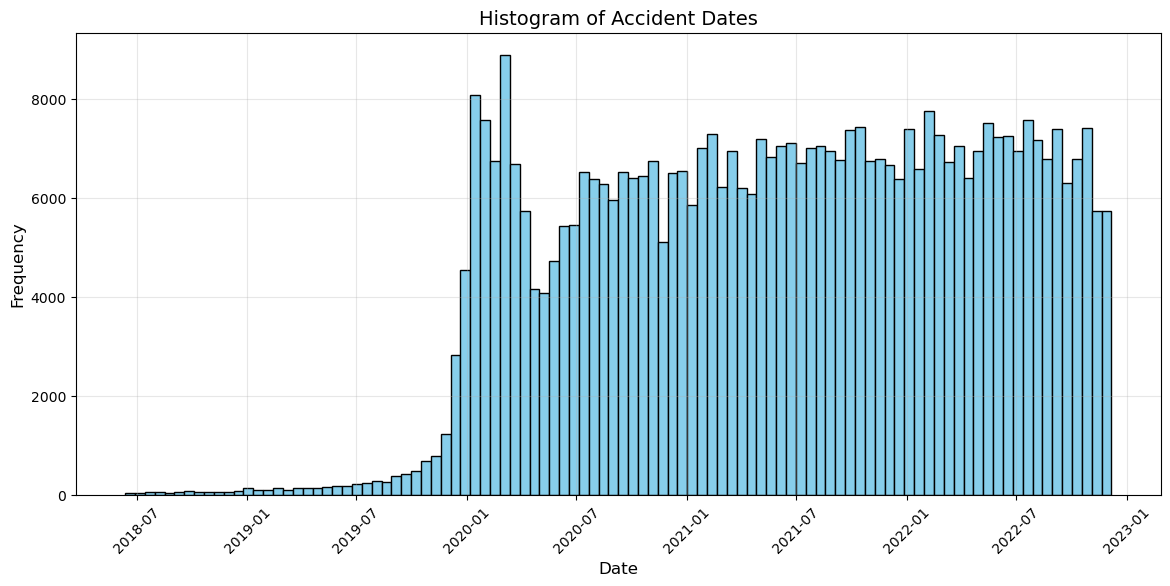

In [123]:
plt.figure(figsize=(14, 6))
plt.hist(X_train['Accident Date'], bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of Accident Dates', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(alpha=0.3)
plt.show()

In [124]:
non_null_dates = X_train['Accident Date'].dropna()

mean_date = non_null_dates.mean()
median_date = non_null_dates.median()
mode_date = non_null_dates.mode()[0]

print(f"Mean Accident Date: {mean_date}")
print(f"Median Accident Date: {median_date}")
print(f"Mode Accident Date: {mode_date}")

Mean Accident Date: 2021-06-13 02:51:52.648849664
Median Accident Date: 2021-06-27 00:00:00
Mode Accident Date: 2020-03-01 00:00:00


Due to the skewness observed in the distribution of the Accident Date column, we decided to impute the missing values with the median.

In [126]:
def impute_accident_year(X_train, X_val, df_test):

    accident_year_mean = non_null_dates.median()

    X_train['Accident Date'] = X_train['Accident Date'].fillna(accident_year_mean)
    X_val['Accident Date'] = X_val['Accident Date'].fillna(accident_year_mean)
    df_test['Accident Date'] = df_test['Accident Date'].fillna(accident_year_mean)

    return X_train, X_val, df_test

In [127]:
X_train, X_val, df_test = impute_accident_year(X_train, X_val, df_test)

In [128]:
print(f"Missing values in X_train (Accident Date): {X_train['Accident Date'].isnull().sum()}")
print(f"Missing values in X_val (Accident Date): {X_val['Accident Date'].isnull().sum()}")
print(f"Missing values in df_test (Accident Date): {df_test['Accident Date'].isnull().sum()}")

Missing values in X_train (Accident Date): 0
Missing values in X_val (Accident Date): 0
Missing values in df_test (Accident Date): 0


### Age at Injury

In [130]:
print(f"Missing values in X_train: {X_train['Age at Injury'].isnull().sum()}")
print(f"Missing values in X_val: {X_val['Age at Injury'].isnull().sum()}")
print(f"Missing values in df_test: {df_test['Age at Injury'].isnull().sum()}")

Missing values in X_train: 4762
Missing values in X_val: 1206
Missing values in df_test: 3916


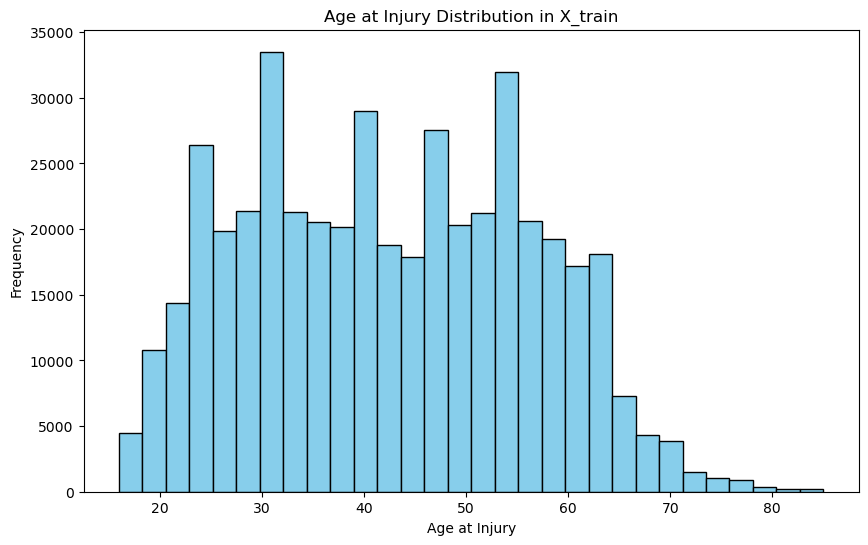

In [131]:
age_data = X_train['Age at Injury'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(age_data, bins=30, color='skyblue', edgecolor='black')

plt.title('Age at Injury Distribution in X_train')
plt.xlabel('Age at Injury')
plt.ylabel('Frequency')

plt.show()

In [132]:
mean_age = age_data.mean()
median_age = age_data.median()

print(f"Mean Age at Injury: {mean_age:.2f}")
print(f"Median Age at Injury: {median_age:.2f}")

Mean Age at Injury: 42.50
Median Age at Injury: 42.00


In this case, mean and median imputation is very similar. We are going to use the median.

In [134]:
def impute_age_at_injury(X_train, X_val, df_test):

    imputer = SimpleImputer(strategy='median')

    X_train['Age at Injury'] = imputer.fit_transform(X_train[['Age at Injury']])
    X_val['Age at Injury'] = imputer.transform(X_val[['Age at Injury']])
    df_test['Age at Injury'] = imputer.transform(df_test[['Age at Injury']])

    return X_train, X_val, df_test

In [135]:
X_train, X_val, df_test = impute_age_at_injury(X_train, X_val, df_test)

In [136]:
print(f"Missing values in X_train: {X_train['Age at Injury'].isnull().sum()}")
print(f"Missing values in X_val: {X_val['Age at Injury'].isnull().sum()}")
print(f"Missing values in df_test: {df_test['Age at Injury'].isnull().sum()}")

Missing values in X_train: 0
Missing values in X_val: 0
Missing values in df_test: 0


### Alternative Dispute Resolution

In [138]:
X_train['Alternative Dispute Resolution'].value_counts()

Alternative Dispute Resolution
N    457147
Y      2068
U         5
Name: count, dtype: int64

In [139]:
X_val['Alternative Dispute Resolution'].value_counts()

Alternative Dispute Resolution
N    114264
Y       541
Name: count, dtype: int64

In [140]:
df_test['Alternative Dispute Resolution'].value_counts()

Alternative Dispute Resolution
N    386314
Y      1660
U         1
Name: count, dtype: int64

We will impute these Unknowns with the mode.

In [142]:
def impute_adr_mode(X_train, X_val, df_test):

    ADR_mode = X_train['Alternative Dispute Resolution'].mode()[0]
    
    X_train['Alternative Dispute Resolution'] = X_train['Alternative Dispute Resolution'].replace('U', ADR_mode)
    X_val['Alternative Dispute Resolution'] = X_val['Alternative Dispute Resolution'].replace('U', ADR_mode)
    df_test['Alternative Dispute Resolution'] = df_test['Alternative Dispute Resolution'].replace('U', ADR_mode)

    return X_train, X_val, df_test

In [143]:
X_train, X_val, df_test = impute_adr_mode(X_train, X_val, df_test)

In [144]:
X_train['Alternative Dispute Resolution'].value_counts()

Alternative Dispute Resolution
N    457152
Y      2068
Name: count, dtype: int64

### Assembly Date

In [146]:
print(f"Null values in X_train 'Assembly Date': {X_train['Assembly Date'].isna().sum()}")
print(f"Null values in X_val 'Assembly Date': {X_val['Assembly Date'].isna().sum()}")
print(f"Null values in df_test 'Assembly Date': {df_test['Assembly Date'].isna().sum()}")

Null values in X_train 'Assembly Date': 8414
Null values in X_val 'Assembly Date': 2088
Null values in df_test 'Assembly Date': 0


Since there are no missing values in df_test, we decided to drop the rows with missing values in both X_train and X_val. 

In [148]:
X_train = X_train.dropna(subset=['Assembly Date'])
X_val = X_val.dropna(subset=['Assembly Date'])

y_train = y_train.loc[X_train.index]
y_val = y_val.loc[X_val.index]

In [149]:
print(f"Null values in X_train 'Assembly Date': {X_train['Assembly Date'].isna().sum()}")
print(f"Null values in X_val 'Assembly Date': {X_val['Assembly Date'].isna().sum()}")
print(f"Null values in df_test 'Assembly Date': {df_test['Assembly Date'].isna().sum()}")

Null values in X_train 'Assembly Date': 0
Null values in X_val 'Assembly Date': 0
Null values in df_test 'Assembly Date': 0


### C-2 Date

In [151]:
print(f"Null values in X_train 'C-2 Date': {X_train['C-2 Date'].isna().sum()}")
print(f"Null values in X_val 'C-2 Date': {X_val['C-2 Date'].isna().sum()}")
print(f"Null values in df_test 'C-2 Date': {df_test['C-2 Date'].isna().sum()}")

Null values in X_train 'C-2 Date': 14084
Null values in X_val 'C-2 Date': 3592
Null values in df_test 'C-2 Date': 9134


In [152]:
def fill_c2_date_with_bfill(X_train, X_val, df_test):

    X_train_original_order = X_train.index
    X_val_original_order = X_val.index
    df_test_original_order = df_test.index

    X_train_sorted = X_train.sort_values(by='Accident Date', ascending=True)
    X_val_sorted = X_val.sort_values(by='Accident Date', ascending=True)
    df_test_sorted = df_test.sort_values(by='Accident Date', ascending=True)
    
    X_train_sorted['C-2 Date'] = X_train_sorted['C-2 Date'].bfill()
    X_val_sorted['C-2 Date'] = X_val_sorted['C-2 Date'].bfill()
    df_test_sorted['C-2 Date'] = df_test_sorted['C-2 Date'].bfill()
    
    X_train_sorted = X_train_sorted.loc[X_train_original_order]
    X_val_sorted = X_val_sorted.loc[X_val_original_order]
    df_test_sorted = df_test_sorted.loc[df_test_original_order]
    
    return X_train_sorted, X_val_sorted, df_test_sorted

In [153]:
X_train, X_val, df_test = fill_c2_date_with_bfill(X_train, X_val, df_test)

Here, we first ordered the data by 'Accident Date' to ensure that the 'C-2 Date' values are imputed in a chronological order. In this way we maintain the temporal relationship between the accident and the corresponding 'C-2 Date', which allows us to use the backfill method more effectively, filling missing values with the next available valid entry in the correct sequence.

In [155]:
print(f"Null values in X_train 'C-2 Date': {X_train['C-2 Date'].isna().sum()}")
print(f"Null values in X_val 'C-2 Date': {X_val['C-2 Date'].isna().sum()}")
print(f"Null values in df_test 'C-2 Date': {df_test['C-2 Date'].isna().sum()}")

Null values in X_train 'C-2 Date': 0
Null values in X_val 'C-2 Date': 0
Null values in df_test 'C-2 Date': 0


### C-3 Date

In [157]:
print(f"Null values in X_train 'C-3 Date': {X_train['C-3 Date'].isna().sum()}")
print(f"Null values in X_val 'C-3 Date': {X_val['C-3 Date'].isna().sum()}")
print(f"Null values in df_test 'C-3 Date': {df_test['C-3 Date'].isna().sum()}")

Null values in X_train 'C-3 Date': 304654
Null values in X_val 'C-3 Date': 75946
Null values in df_test 'C-3 Date': 302759


We treated the null values in the 'C-3 Date' column as cases where the 'C-3' form was not received. To handle this, we created a new binary variable, 'C-3 Received,' where a value of 0 indicates that the 'C-3 Date' is null (meaning the form was not received), and a value of 1 indicates that the 'C-3 Date' exists (meaning the form was received).

In [159]:
X_train['C-3 Received'] = X_train['C-3 Date'].apply(lambda x: 0 if pd.isnull(x) else 1)
X_train = X_train.drop(columns=['C-3 Date'])

In [160]:
X_val['C-3 Received'] = X_val['C-3 Date'].apply(lambda x: 0 if pd.isnull(x) else 1)
X_val = X_val.drop(columns=['C-3 Date'])

In [161]:
df_test['C-3 Received'] = df_test['C-3 Date'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_test = df_test.drop(columns=['C-3 Date'])

### First Hearing Date

In [163]:
print(f"Null values in X_train 'First Hearing Date': {X_train['First Hearing Date'].isna().sum()}")
print(f"Null values in X_val 'First Hearing Date': {X_val['First Hearing Date'].isna().sum()}")
print(f"Null values in df_test 'First Hearing Date': {df_test['First Hearing Date'].isna().sum()}")

Null values in X_train 'First Hearing Date': 334392
Null values in X_val 'First Hearing Date': 83531
Null values in df_test 'First Hearing Date': 344947


Similarly, for the 'First Hearing Date' column, we treated the null values as instances where the first hearing had not yet occurred. To address this, we created a binary variable called 'First Hearing Happened.' A value of 0 in this column indicates that the 'First Hearing Date' is null (meaning the hearing has not occurred), and a value of 1 indicates that the date is present (meaning the hearing has taken place). 

In [165]:
X_train['First Hearing Happened'] = X_train['First Hearing Date'].apply(lambda x: 0 if pd.isnull(x) else 1)
X_train = X_train.drop(columns=['First Hearing Date'])

In [166]:
X_val['First Hearing Happened'] = X_val['First Hearing Date'].apply(lambda x: 0 if pd.isnull(x) else 1)
X_val = X_val.drop(columns=['First Hearing Date'])

In [167]:
df_test['First Hearing Happened'] = df_test['First Hearing Date'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_test = df_test.drop(columns=['First Hearing Date'])

### Attorney/Representative

In [169]:
X_train['Attorney/Representative'].value_counts()

Attorney/Representative
N    307865
Y    142941
Name: count, dtype: int64

In [170]:
X_val['Attorney/Representative'].value_counts()

Attorney/Representative
N    77044
Y    35673
Name: count, dtype: int64

In [171]:
df_test['Attorney/Representative'].value_counts()

Attorney/Representative
N    306476
Y     81499
Name: count, dtype: int64

Everything looks fine!

### Carrier Type

In [174]:
print(f"Missing values in X_train: {X_train['Carrier Type'].isnull().sum()}")
print(f"Missing values in X_val: {X_val['Carrier Type'].isnull().sum()}")
print(f"Missing values in df_test: {df_test['Carrier Type'].isnull().sum()}")

Missing values in X_train: 0
Missing values in X_val: 0
Missing values in df_test: 0


### Carrier Name

In [176]:
print(f"Missing values in X_train: {X_train['Carrier Name'].isnull().sum()}")
print(f"Missing values in X_val: {X_val['Carrier Name'].isnull().sum()}")
print(f"Missing values in df_test: {df_test['Carrier Name'].isnull().sum()}")

Missing values in X_train: 0
Missing values in X_val: 0
Missing values in df_test: 0


### Industry Code

In [178]:
print(f"Missing values in X_train: {X_train['Industry Code'].isnull().sum()}")
print(f"Missing values in X_val: {X_val['Industry Code'].isnull().sum()}")
print(f"Missing values in df_test: {df_test['Industry Code'].isnull().sum()}")

Missing values in X_train: 7848
Missing values in X_val: 1957
Missing values in df_test: 7736


In [179]:
def impute_industry_code(X_train, X_val, df_test):

    industry_code_mode = X_train.groupby('Carrier Type')['Industry Code'].agg(
        lambda x: x.mode()[0] if not x.mode().empty else np.nan
    )

    def fill_industry_code(row):
        if pd.notnull(row['Industry Code']):
            return row['Industry Code']
        elif pd.notnull(row['Carrier Type']):
            return industry_code_mode.get(row['Carrier Type'], row['Industry Code'])
        else:
            return row['Industry Code']

    X_train['Industry Code'] = X_train.apply(fill_industry_code, axis=1)
    X_val['Industry Code'] = X_val.apply(fill_industry_code, axis=1)
    df_test['Industry Code'] = df_test.apply(fill_industry_code, axis=1)

    return X_train, X_val, df_test

In [180]:
X_train, X_val, df_test = impute_industry_code(X_train, X_val, df_test)

We imputed missing values in the 'Industry Code' column based on the most frequent 'Industry Code' for each 'Carrier Type' in the training data. For each row, if the 'Industry Code' is missing and the 'Carrier Type' is available, we replaced the missing value with the most common 'Industry Code' associated with that 'Carrier Type'. If both values were missing, the 'Industry Code' was left as NaN.

In [182]:
print(f"Missing values in X_train: {X_train['Carrier Type'].isnull().sum()}")
print(f"Missing values in X_val: {X_val['Carrier Type'].isnull().sum()}")
print(f"Missing values in df_test: {df_test['Carrier Type'].isnull().sum()}")

Missing values in X_train: 0
Missing values in X_val: 0
Missing values in df_test: 0


### Average Weekly Wage

In [184]:
print(f"Missing values in X_train: {X_train['Average Weekly Wage'].isnull().sum()}")
print(f"Missing values in X_val: {X_val['Average Weekly Wage'].isnull().sum()}")
print(f"Missing values in df_test: {df_test['Average Weekly Wage'].isnull().sum()}")

Missing values in X_train: 298459
Missing values in X_val: 74758
Missing values in df_test: 340084


In [185]:
def impute_aww(X_train, X_val, df_test):

    X_train_no_nulls = X_train[X_train['Average Weekly Wage'].notnull()]
    

    wage_mean = X_train_no_nulls.groupby(['Industry Code', 'Carrier Type'])['Average Weekly Wage'].mean()
    wage_mean_industry = X_train_no_nulls.groupby('Industry Code')['Average Weekly Wage'].mean()
    wage_mean_carrier = X_train_no_nulls.groupby('Carrier Type')['Average Weekly Wage'].mean()
    overall_mean = X_train_no_nulls['Average Weekly Wage'].mean()


    def fill_wage(row):
        if pd.notnull(row['Average Weekly Wage']):
            return row['Average Weekly Wage']
        if pd.notnull(row['Industry Code']) and pd.notnull(row['Carrier Type']):
            return wage_mean.get((row['Industry Code'], row['Carrier Type']), overall_mean)
        elif pd.notnull(row['Industry Code']):
            return wage_mean_industry.get(row['Industry Code'], overall_mean)
        elif pd.notnull(row['Carrier Type']):
            return wage_mean_carrier.get(row['Carrier Type'], overall_mean)
        else:
            return overall_mean


    X_train['Average Weekly Wage'] = X_train.apply(fill_wage, axis=1)
    X_val['Average Weekly Wage'] = X_val.apply(fill_wage, axis=1)
    df_test['Average Weekly Wage'] = df_test.apply(fill_wage, axis=1)

    return X_train, X_val, df_test

In [186]:
X_train, X_val, df_test = impute_aww(X_train, X_val, df_test)

First, we calculated the mean 'Average Weekly Wage' for combinations of 'Industry Code' and 'Carrier Type', as well as separately for each 'Industry Code' and 'Carrier Type'. If both 'Industry Code' and 'Carrier Type' were available, we used their combined mean. If only one of these variables was present, we used the corresponding mean for that variable. If neither was available, we used the overall mean 'Average Weekly Wage' from the entire dataset.

In [188]:
print(f"Null values in X_train 'Average Weekly Wage': {X_train['Average Weekly Wage'].isna().sum()}")
print(f"Null values in X_val 'Average Weekly Wage': {X_val['Average Weekly Wage'].isna().sum()}")
print(f"Null values in df_test 'Average Weekly Wage': {df_test['Average Weekly Wage'].isna().sum()}")

Null values in X_train 'Average Weekly Wage': 0
Null values in X_val 'Average Weekly Wage': 0
Null values in df_test 'Average Weekly Wage': 0


### Birth Year

In [190]:
print(f"Null values in X_train 'Birth Year': {X_train['Birth Year'].isna().sum()}")
print(f"Null values in X_val 'Birth Year': {X_val['Birth Year'].isna().sum()}")
print(f"Null values in df_test 'Birth Year': {df_test['Birth Year'].isna().sum()}")

Null values in X_train 'Birth Year': 43033
Null values in X_val 'Birth Year': 10741
Null values in df_test 'Birth Year': 39730


In [191]:
def impute_birth_year(X_train, X_val, df_test):
    def calculate_birth_year(row):
        if pd.notnull(row['Birth Year']):
            return row['Birth Year']
        if pd.notnull(row['Accident Date']) and pd.notnull(row['Age at Injury']):
            accident_year = row['Accident Date'].year  # Extract the year from the datetime
            return accident_year - row['Age at Injury']
        return row['Birth Year']
    
    X_train['Birth Year'] = X_train.apply(calculate_birth_year, axis=1)
    X_val['Birth Year'] = X_val.apply(calculate_birth_year, axis=1)
    df_test['Birth Year'] = df_test.apply(calculate_birth_year, axis=1)

    return X_train, X_val, df_test

In [192]:
X_train, X_val, df_test = impute_birth_year(X_train, X_val, df_test)

We imputed missing values in the 'Birth Year' column by calculating it based on the 'Age at Injury' and 'Accident Date'. 

In [194]:
print(f"Null values in X_train 'Birth Year': {X_train['Birth Year'].isna().sum()}")
print(f"Null values in X_val 'Birth Year': {X_val['Birth Year'].isna().sum()}")
print(f"Null values in df_test 'Birth Year': {df_test['Birth Year'].isna().sum()}")

Null values in X_train 'Birth Year': 0
Null values in X_val 'Birth Year': 0
Null values in df_test 'Birth Year': 0


### County of Injury

In [196]:
print(f"Null values in X_train 'County of Injury': {X_train['County of Injury'].isna().sum()}")
print(f"Null values in X_val 'County of Injury': {X_val['County of Injury'].isna().sum()}")
print(f"Null values in df_test 'County of Injury': {df_test['County of Injury'].isna().sum()}")

Null values in X_train 'County of Injury': 0
Null values in X_val 'County of Injury': 0
Null values in df_test 'County of Injury': 0


### COVID-19 Indicator

In [198]:
print(f"Null values in X_train 'COVID-19 Indicator': {X_train['COVID-19 Indicator'].isna().sum()}")
print(f"Null values in X_val 'COVID-19 Indicator': {X_val['COVID-19 Indicator'].isna().sum()}")
print(f"Null values in df_test 'COVID-19 Indicator': {df_test['COVID-19 Indicator'].isna().sum()}")

Null values in X_train 'COVID-19 Indicator': 0
Null values in X_val 'COVID-19 Indicator': 0
Null values in df_test 'COVID-19 Indicator': 0


In [199]:
X_train['COVID-19 Indicator'].value_counts()

COVID-19 Indicator
N    428836
Y     21970
Name: count, dtype: int64

In [200]:
X_val['COVID-19 Indicator'].value_counts()

COVID-19 Indicator
N    107326
Y      5391
Name: count, dtype: int64

In [201]:
df_test['COVID-19 Indicator'].value_counts()

COVID-19 Indicator
N    385434
Y      2541
Name: count, dtype: int64

### District Name

In [203]:
print(f"Null values in X_train 'District Name': {X_train['District Name'].isna().sum()}")
print(f"Null values in X_val 'District Name': {X_val['District Name'].isna().sum()}")
print(f"Null values in df_test 'District Name': {df_test['District Name'].isna().sum()}")

Null values in X_train 'District Name': 0
Null values in X_val 'District Name': 0
Null values in df_test 'District Name': 0


In [204]:
X_train['District Name'].value_counts()

District Name
NYC           212657
ALBANY         67493
HAUPPAUGE      47749
BUFFALO        35819
SYRACUSE       35146
ROCHESTER      31679
BINGHAMTON     17128
STATEWIDE       3135
Name: count, dtype: int64

In [205]:
X_val['District Name'].value_counts()

District Name
NYC           52980
ALBANY        17108
HAUPPAUGE     11795
BUFFALO        8942
SYRACUSE       8684
ROCHESTER      8088
BINGHAMTON     4347
STATEWIDE       773
Name: count, dtype: int64

In [206]:
df_test['District Name'].value_counts()

District Name
NYC           187972
ALBANY         56500
HAUPPAUGE      36656
BUFFALO        31481
SYRACUSE       29537
ROCHESTER      28073
BINGHAMTON     15382
STATEWIDE       2374
Name: count, dtype: int64

### Gender

In [208]:
print(f"Null values in X_train 'Gender': {X_train['Gender'].isna().sum()}")
print(f"Null values in X_val 'Gender': {X_val['Gender'].isna().sum()}")
print(f"Null values in df_test 'Gender': {df_test['Gender'].isna().sum()}")

Null values in X_train 'Gender': 0
Null values in X_val 'Gender': 0
Null values in df_test 'Gender': 0


In [209]:
X_train['Gender'].value_counts()

Gender
M    263471
F    183641
U      3662
X        32
Name: count, dtype: int64

In [210]:
X_val['Gender'].value_counts()

Gender
M    65781
F    45975
U      951
X       10
Name: count, dtype: int64

In [211]:
df_test['Gender'].value_counts()

Gender
M    215343
F    167019
U      5340
X       273
Name: count, dtype: int64

### IME-4 Count

In [213]:
print(f"Null values in X_train 'IME-4 Count': {X_train['IME-4 Count'].isna().sum()}")
print(f"Null values in X_val 'IME-4 Count': {X_val['IME-4 Count'].isna().sum()}")
print(f"Null values in df_test 'IME-4 Count': {df_test['IME-4 Count'].isna().sum()}")

Null values in X_train 'IME-4 Count': 349396
Null values in X_val 'IME-4 Count': 87294
Null values in df_test 'IME-4 Count': 352793


In [214]:
X_train['IME-4 Count'].value_counts()

IME-4 Count
1.0     31623
2.0     27108
3.0     12661
4.0     10767
5.0      6002
6.0      5051
7.0      3021
8.0      2512
9.0      1517
10.0     1148
Name: count, dtype: int64

In [215]:
X_val['IME-4 Count'].value_counts()

IME-4 Count
1.0     7807
2.0     6781
3.0     3219
4.0     2761
5.0     1566
6.0     1274
7.0      756
8.0      597
9.0      379
10.0     283
Name: count, dtype: int64

In [216]:
df_test['IME-4 Count'].value_counts()

IME-4 Count
1.0     14410
2.0     12451
3.0      3269
4.0      2917
5.0       801
6.0       782
7.0       249
8.0       185
9.0        67
10.0       51
Name: count, dtype: int64

The Count variable for IME-4 represents the number of IME-4 forms received for every claim. The IME-4 means an Independent Examiner's Report of Independent Medical Examination. Because the count of IME-4 forms has no zeros and there is a distribution value starting with 1, we suspect that the missing values likely correspond to people who did not visit a doctor for an examination and, therefore, should be regarded as having a count of 0 for the IME-4 forms. 

In [218]:
X_train['IME-4 Count'] = X_train['IME-4 Count'].apply(lambda x: 0 if pd.isna(x) else x)
X_val['IME-4 Count'] = X_val['IME-4 Count'].apply(lambda x: 0 if pd.isna(x) else x)
df_test['IME-4 Count'] = df_test['IME-4 Count'].apply(lambda x: 0 if pd.isna(x) else x)

In [219]:
print(f"Null values in X_train 'IME-4 Count': {X_train['IME-4 Count'].isna().sum()}")
print(f"Null values in X_val 'IME-4 Count': {X_val['IME-4 Count'].isna().sum()}")
print(f"Null values in df_test 'IME-4 Count': {df_test['IME-4 Count'].isna().sum()}")

Null values in X_train 'IME-4 Count': 0
Null values in X_val 'IME-4 Count': 0
Null values in df_test 'IME-4 Count': 0


### Medical Fee Region

In [221]:
print(f"Null values in X_train 'Medical Fee Region': {X_train['Medical Fee Region'].isna().sum()}")
print(f"Null values in X_val 'Medical Fee Region': {X_val['Medical Fee Region'].isna().sum()}")
print(f"Null values in df_test 'Medical Fee Region': {df_test['Medical Fee Region'].isna().sum()}")

Null values in X_train 'Medical Fee Region': 0
Null values in X_val 'Medical Fee Region': 0
Null values in df_test 'Medical Fee Region': 0


In [222]:
X_train['Medical Fee Region'].value_counts()

Medical Fee Region
IV     208786
I      106543
II      66752
III     42307
UK      26418
Name: count, dtype: int64

In [223]:
X_val['Medical Fee Region'].value_counts()

Medical Fee Region
IV     52182
I      26885
II     16747
III    10429
UK      6474
Name: count, dtype: int64

In [224]:
df_test['Medical Fee Region'].value_counts()

Medical Fee Region
IV     182276
I       91300
II      58743
III     34679
UK      20977
Name: count, dtype: int64

There are no missing values, but there are some 'UK' values. We will fill the 'UK' values in the 'Medical Fee Region' based on the most common Medical Fee Region for each County of Injury, as these variables are intuitively related.

In [226]:
def impute_medical_fee_region(X_train, X_val, df_test):

    X_train_without_UK = X_train[X_train['Medical Fee Region'] != 'UK']
    most_common_fee_region = X_train_without_UK.groupby('County of Injury')['Medical Fee Region'].agg(lambda x: x.mode()[0])

    def fill_fee_region(row):
        if row['Medical Fee Region'] == 'UK' and pd.notnull(row['County of Injury']):
            return most_common_fee_region.get(row['County of Injury'], row['Medical Fee Region'])
        return row['Medical Fee Region']
    
    X_train['Medical Fee Region'] = X_train.apply(fill_fee_region, axis=1)
    X_val['Medical Fee Region'] = X_val.apply(fill_fee_region, axis=1)
    df_test['Medical Fee Region'] = df_test.apply(fill_fee_region, axis=1)

    return X_train, X_val, df_test

In [227]:
X_train, X_val, df_test = impute_medical_fee_region(X_train, X_val, df_test)

In [228]:
X_train['Medical Fee Region'].value_counts()

Medical Fee Region
IV     227357
I      109019
II      68695
III     45735
Name: count, dtype: int64

In [229]:
X_val['Medical Fee Region'].value_counts()

Medical Fee Region
IV     56713
I      27461
II     17253
III    11290
Name: count, dtype: int64

In [230]:
df_test['Medical Fee Region'].value_counts()

Medical Fee Region
IV     197754
I       92972
II      59964
III     37285
Name: count, dtype: int64

### OIICS Nature of Injury Description

In [232]:
print(f"Null values in X_train 'OIICS Nature of Injury Description': {X_train['OIICS Nature of Injury Description'].isna().sum()}")
print(f"Null values in X_val 'OIICS Nature of Injury Description': {X_val['OIICS Nature of Injury Description'].isna().sum()}")
print(f"Null values in df_test 'OIICS Nature of Injury Description': {df_test['OIICS Nature of Injury Description'].isna().sum()}")

Null values in X_train 'OIICS Nature of Injury Description': 450806
Null values in X_val 'OIICS Nature of Injury Description': 112717
Null values in df_test 'OIICS Nature of Injury Description': 387975


In [233]:
X_train.drop(['OIICS Nature of Injury Description'], axis=1, inplace=True)
X_val.drop(['OIICS Nature of Injury Description'], axis=1, inplace=True)
df_test.drop(['OIICS Nature of Injury Description'], axis=1, inplace=True)

### WCIO Cause of Injury Code

In [235]:
print(f"Null values in X_train 'WCIO Cause of Injury Code': {X_train['WCIO Cause of Injury Code'].isna().sum()}")
print(f"Null values in X_val 'WCIO Cause of Injury Code': {X_val['WCIO Cause of Injury Code'].isna().sum()}")
print(f"Null values in df_test 'WCIO Cause of Injury Code': {df_test['WCIO Cause of Injury Code'].isna().sum()}")

Null values in X_train 'WCIO Cause of Injury Code': 12258
Null values in X_val 'WCIO Cause of Injury Code': 3147
Null values in df_test 'WCIO Cause of Injury Code': 10348


To address these missing values, we will use group-based imputation based on the 'Carrier Type' and 'Injury Code'.

In [237]:
def impute_wcicause(X_train, X_val, df_test):
    overall_mode = X_train['WCIO Cause of Injury Code'].mode()[0]
    wcio_cause_mode = X_train.groupby(['Carrier Type', 'Industry Code'])['WCIO Cause of Injury Code'].agg(
        lambda x: x.mode()[0] if not x.mode().empty else overall_mode)
    
    wcio_cause_mode_carrier = X_train.groupby('Carrier Type')['WCIO Cause of Injury Code'].agg(
        lambda x: x.mode()[0] if not x.mode().empty else overall_mode)
    
    wcio_cause_mode_industry = X_train.groupby('Industry Code')['WCIO Cause of Injury Code'].agg(
        lambda x: x.mode()[0] if not x.mode().empty else overall_mode)

    def fill_wcicause(row):
        if pd.notnull(row['WCIO Cause of Injury Code']):
            return row['WCIO Cause of Injury Code']
        if pd.notnull(row['Carrier Type']) and pd.notnull(row['Industry Code']):
            return wcio_cause_mode.get((row['Carrier Type'], row['Industry Code']), overall_mode)
        elif pd.notnull(row['Carrier Type']):
            return wcio_cause_mode_carrier.get(row['Carrier Type'], overall_mode)
        elif pd.notnull(row['Industry Code']):
            return wcio_cause_mode_industry.get(row['Industry Code'], overall_mode)
        else:
            return overall_mode

    X_train['WCIO Cause of Injury Code'] = X_train.apply(fill_wcicause, axis=1)
    X_val['WCIO Cause of Injury Code'] = X_val.apply(fill_wcicause, axis=1)
    df_test['WCIO Cause of Injury Code'] = df_test.apply(fill_wcicause, axis=1)

    X_train['WCIO Cause of Injury Code'] = X_train['WCIO Cause of Injury Code'].astype('float64').round().astype('int64')
    X_val['WCIO Cause of Injury Code'] = X_val['WCIO Cause of Injury Code'].astype('float64').round().astype('int64')
    df_test['WCIO Cause of Injury Code'] = df_test['WCIO Cause of Injury Code'].astype('float64').round().astype('int64')

    return X_train, X_val, df_test

In [238]:
X_train, X_val, df_test = impute_wcicause(X_train, X_val, df_test)

In [239]:
print(f"Null values in X_train 'WCIO Cause of Injury Code': {X_train['WCIO Cause of Injury Code'].isna().sum()}")
print(f"Null values in X_val 'WCIO Cause of Injury Code': {X_val['WCIO Cause of Injury Code'].isna().sum()}")
print(f"Null values in df_test 'WCIO Cause of Injury Code': {df_test['WCIO Cause of Injury Code'].isna().sum()}")

Null values in X_train 'WCIO Cause of Injury Code': 0
Null values in X_val 'WCIO Cause of Injury Code': 0
Null values in df_test 'WCIO Cause of Injury Code': 0


### WCIO Nature of Injury Code

In [241]:
print(f"Null values in X_train 'WCIO Nature of Injury Code': {X_train['WCIO Nature of Injury Code'].isna().sum()}")
print(f"Null values in X_val 'WCIO Nature of Injury Code': {X_val['WCIO Nature of Injury Code'].isna().sum()}")
print(f"Null values in df_test 'WCIO Nature of Injury Code': {df_test['WCIO Nature of Injury Code'].isna().sum()}")

Null values in X_train 'WCIO Nature of Injury Code': 12273
Null values in X_val 'WCIO Nature of Injury Code': 3149
Null values in df_test 'WCIO Nature of Injury Code': 10560


We will use group-based imputation based on 'Injury Code' and 'WCIO Cause of Injury Code' to fill the missing values.

In [243]:
def impute_wcionature(X_train, X_val, df_test):
    overall_mode = X_train['WCIO Nature of Injury Code'].mode()[0]
    
    wcio_nature_mode = X_train.groupby(['Industry Code', 'WCIO Cause of Injury Code'])['WCIO Nature of Injury Code'].agg(
        lambda x: x.mode()[0] if not x.mode().empty else overall_mode)
    
    wcio_nature_mode_industry = X_train.groupby('Industry Code')['WCIO Nature of Injury Code'].agg(
        lambda x: x.mode()[0] if not x.mode().empty else overall_mode)
    
    wcio_nature_mode_cause = X_train.groupby('WCIO Cause of Injury Code')['WCIO Nature of Injury Code'].agg(
        lambda x: x.mode()[0] if not x.mode().empty else overall_mode)

    def fill_wcionature(row):
        if pd.notnull(row['WCIO Nature of Injury Code']):
            return row['WCIO Nature of Injury Code']
        if pd.notnull(row['Industry Code']) and pd.notnull(row['WCIO Cause of Injury Code']):
            return wcio_nature_mode.get((row['Industry Code'], row['WCIO Cause of Injury Code']), overall_mode)
        elif pd.notnull(row['Industry Code']):
            return wcio_nature_mode_industry.get(row['Industry Code'], overall_mode)
        elif pd.notnull(row['WCIO Cause of Injury Code']):
            return wcio_nature_mode_cause.get(row['WCIO Cause of Injury Code'], overall_mode)
        else:
            return overall_mode

    X_train['WCIO Nature of Injury Code'] = X_train.apply(fill_wcionature, axis=1)
    X_val['WCIO Nature of Injury Code'] = X_val.apply(fill_wcionature, axis=1)
    df_test['WCIO Nature of Injury Code'] = df_test.apply(fill_wcionature, axis=1)

    X_train['WCIO Nature of Injury Code'] = X_train['WCIO Nature of Injury Code'].astype('float64').round().astype('int64')
    X_val['WCIO Nature of Injury Code'] = X_val['WCIO Nature of Injury Code'].astype('float64').round().astype('int64')
    df_test['WCIO Nature of Injury Code'] = df_test['WCIO Nature of Injury Code'].astype('float64').round().astype('int64')

    return X_train, X_val, df_test

In [244]:
X_train, X_val, df_test = impute_wcionature(X_train, X_val, df_test)

In [245]:
print(f"Null values in X_train 'WCIO Nature of Injury Code': {X_train['WCIO Nature of Injury Code'].isna().sum()}")
print(f"Null values in X_val 'WCIO Nature of Injury Code': {X_val['WCIO Nature of Injury Code'].isna().sum()}")
print(f"Null values in df_test 'WCIO Nature of Injury Code': {df_test['WCIO Nature of Injury Code'].isna().sum()}")

Null values in X_train 'WCIO Nature of Injury Code': 0
Null values in X_val 'WCIO Nature of Injury Code': 0
Null values in df_test 'WCIO Nature of Injury Code': 0


### WCIO Part Of Body Code

In [247]:
print(f"Null values in X_train 'WCIO Part Of Body Code': {X_train['WCIO Part Of Body Code'].isna().sum()}")
print(f"Null values in X_val 'WCIO Part Of Body Code': {X_val['WCIO Part Of Body Code'].isna().sum()}")
print(f"Null values in df_test 'WCIO Part Of Body Code': {df_test['WCIO Part Of Body Code'].isna().sum()}")

Null values in X_train 'WCIO Part Of Body Code': 13365
Null values in X_val 'WCIO Part Of Body Code': 3461
Null values in df_test 'WCIO Part Of Body Code': 9549


We will use group-based imputation based on 'WCIO Cause of Injury Code' and 'WCIO Nature of Injury Code' to fill the missing values.

In [249]:
def impute_wciopart(X_train, X_val, df_test):
    overall_mode = X_train['WCIO Part Of Body Code'].mode()[0]
    
    wcio_part_mode = X_train.groupby(['WCIO Cause of Injury Code', 'WCIO Nature of Injury Code'])['WCIO Part Of Body Code'].agg(
        lambda x: x.mode()[0] if not x.mode().empty else overall_mode)
    
    wcio_part_mode_cause = X_train.groupby('WCIO Cause of Injury Code')['WCIO Part Of Body Code'].agg(
        lambda x: x.mode()[0] if not x.mode().empty else overall_mode)
    
    wcio_part_mode_nature = X_train.groupby('WCIO Nature of Injury Code')['WCIO Part Of Body Code'].agg(
        lambda x: x.mode()[0] if not x.mode().empty else overall_mode)

    def fill_wciopart(row):
        if pd.notnull(row['WCIO Part Of Body Code']):
            return row['WCIO Part Of Body Code']
        if pd.notnull(row['WCIO Cause of Injury Code']) and pd.notnull(row['WCIO Nature of Injury Code']):
            return wcio_part_mode.get((row['WCIO Cause of Injury Code'], row['WCIO Nature of Injury Code']), overall_mode)
        elif pd.notnull(row['WCIO Cause of Injury Code']):
            return wcio_part_mode_cause.get(row['WCIO Cause of Injury Code'], overall_mode)
        elif pd.notnull(row['WCIO Nature of Injury Code']):
            return wcio_part_mode_nature.get(row['WCIO Nature of Injury Code'], overall_mode)
        else:
            return overall_mode

    X_train['WCIO Part Of Body Code'] = X_train.apply(fill_wciopart, axis=1)
    X_val['WCIO Part Of Body Code'] = X_val.apply(fill_wciopart, axis=1)
    df_test['WCIO Part Of Body Code'] = df_test.apply(fill_wciopart, axis=1)

    X_train['WCIO Part Of Body Code'] = X_train['WCIO Part Of Body Code'].astype('float64').round().astype('int64')
    X_val['WCIO Part Of Body Code'] = X_val['WCIO Part Of Body Code'].astype('float64').round().astype('int64')
    df_test['WCIO Part Of Body Code'] = df_test['WCIO Part Of Body Code'].astype('float64').round().astype('int64')

    return X_train, X_val, df_test

In [250]:
X_train, X_val, df_test = impute_wciopart(X_train, X_val, df_test)

In [251]:
print(f"Null values in X_train 'WCIO Part Of Body Code': {X_train['WCIO Part Of Body Code'].isna().sum()}")
print(f"Null values in X_val 'WCIO Part Of Body Code': {X_val['WCIO Part Of Body Code'].isna().sum()}")
print(f"Null values in df_test 'WCIO Part Of Body Code': {df_test['WCIO Part Of Body Code'].isna().sum()}")

Null values in X_train 'WCIO Part Of Body Code': 0
Null values in X_val 'WCIO Part Of Body Code': 0
Null values in df_test 'WCIO Part Of Body Code': 0


### Zip Code

In [253]:
X_train['Zip Code'].value_counts()

Zip Code
11236    2588
10940    2300
11717    2205
11706    2185
11434    2154
         ... 
11327       1
90501       1
02760       1
11266       1
93308       1
Name: count, Length: 9071, dtype: int64

We noticed that some zip code values were stored as floats, while others were integers. This inconsistency led to multiple categories being created for the same zip code. To resolve this, we wrote a function to standardize the zip codes.

In [255]:
def convert_zip_code(x):
    if pd.notnull(x) and isinstance(x, (int, float, str)):
        try:
            return str(int(float(x)))
        except ValueError:
            return str(x)
    return x

In [256]:
X_train['Zip Code'] = X_train['Zip Code'].apply(convert_zip_code)
X_val['Zip Code'] = X_val['Zip Code'].apply(convert_zip_code)
df_test['Zip Code'] = df_test['Zip Code'].apply(convert_zip_code)

In [257]:
X_train['Zip Code'].value_counts()

Zip Code
11236    2664
10940    2363
11717    2262
11706    2252
11434    2213
         ... 
78730       1
89107       1
25917       1
11327       1
93308       1
Name: count, Length: 7445, dtype: int64

In [258]:
print(f"Null values in X_train 'Zip Code': {X_train['Zip Code'].isna().sum()}")
print(f"Null values in X_val 'Zip Code': {X_val['Zip Code'].isna().sum()}")
print(f"Null values in df_test 'Zip Code': {df_test['Zip Code'].isna().sum()}")

Null values in X_train 'Zip Code': 22480
Null values in X_val 'Zip Code': 5676
Null values in df_test 'Zip Code': 19342


To fill these missing values, we will use a group-based imputation based on 'County of Injury' and 'Medical Fee Region'.

In [260]:
def impute_zip(X_train, X_val, df_test):

    overall_mode = X_train['Zip Code'].mode()[0]
    
    zip_mode = X_train.groupby(['County of Injury', 'Medical Fee Region'])['Zip Code'].agg(
        lambda x: x.mode()[0] if not x.mode().empty else overall_mode)
    
    zip_mode_county = X_train.groupby('County of Injury')['Zip Code'].agg(
        lambda x: x.mode()[0] if not x.mode().empty else overall_mode)
    
    zip_mode_region = X_train.groupby('Medical Fee Region')['Zip Code'].agg(
        lambda x: x.mode()[0] if not x.mode().empty else overall_mode)

    def fill_zip(row):
        if pd.notnull(row['Zip Code']):
            return row['Zip Code']
        if pd.notnull(row['County of Injury']) and pd.notnull(row['Medical Fee Region']):
            return zip_mode.get((row['County of Injury'], row['Medical Fee Region']), overall_mode)
        elif pd.notnull(row['County of Injury']):
            return zip_mode_county.get(row['County of Injury'], overall_mode)
        elif pd.notnull(row['Medical Fee Region']):
            return zip_mode_region.get(row['Medical Fee Region'], overall_mode)
        else:
            return overall_mode

    X_train['Zip Code'] = X_train.apply(fill_zip, axis=1)
    X_val['Zip Code'] = X_val.apply(fill_zip, axis=1)
    df_test['Zip Code'] = df_test.apply(fill_zip, axis=1)

    return X_train, X_val, df_test

In [261]:
X_train, X_val, df_test = impute_zip(X_train, X_val, df_test)

In [262]:
print(f"Null values in X_train 'Zip Code': {X_train['Zip Code'].isna().sum()}")
print(f"Null values in X_val 'Zip Code': {X_val['Zip Code'].isna().sum()}")
print(f"Null values in df_test 'Zip Code': {df_test['Zip Code'].isna().sum()}")

Null values in X_train 'Zip Code': 0
Null values in X_val 'Zip Code': 0
Null values in df_test 'Zip Code': 0


### Agreement Reached

In [264]:
print(f"Null values in X_train 'Agreement Reached': {X_train['Agreement Reached'].isna().sum()}")
print(f"Null values in X_val 'Agreement Reached': {X_val['Agreement Reached'].isna().sum()}")

Null values in X_train 'Agreement Reached': 0
Null values in X_val 'Agreement Reached': 0


In [265]:
X_train['Agreement Reached'].value_counts()

Agreement Reached
0.0    429832
1.0     20974
Name: count, dtype: int64

In [266]:
X_val['Agreement Reached'].value_counts()

Agreement Reached
0.0    107375
1.0      5342
Name: count, dtype: int64

All ok!

### WCB Decision

In [269]:
print(f"Null values in X_train 'WCB Decision': {X_train['WCB Decision'].isna().sum()}")
print(f"Null values in X_val 'WCB Decision': {X_val['WCB Decision'].isna().sum()}")

Null values in X_train 'WCB Decision': 0
Null values in X_val 'WCB Decision': 0


In [270]:
X_train['WCB Decision'].value_counts()

WCB Decision
Not Work Related    450806
Name: count, dtype: int64

In [271]:
X_val['WCB Decision'].value_counts()

WCB Decision
Not Work Related    112717
Name: count, dtype: int64

Since the 'WCB Decision' column contains only a single value ("Not Work Related") across all rows, it does not provide any useful information for analysis. Therefore, we will drop this column from the dataset.

In [273]:
X_train.drop(columns=['WCB Decision'], inplace=True)
X_val.drop(columns=['WCB Decision'], inplace=True)

### Number of Dependents

In [275]:
print(f"Null values in X_train 'Number of Dependents': {X_train['Number of Dependents'].isna().sum()}")
print(f"Null values in X_val 'Number of Dependents': {X_val['Number of Dependents'].isna().sum()}")
print(f"Null values in df_test 'Number of Dependents': {df_test['Number of Dependents'].isna().sum()}")

Null values in X_train 'Number of Dependents': 0
Null values in X_val 'Number of Dependents': 0
Null values in df_test 'Number of Dependents': 0


In [276]:
X_train['Number of Dependents'].value_counts()

Number of Dependents
6.0    64802
3.0    64666
1.0    64362
5.0    64305
2.0    64256
4.0    64238
0.0    64177
Name: count, dtype: int64

In [277]:
X_val['Number of Dependents'].value_counts()

Number of Dependents
6.0    16330
5.0    16290
4.0    16148
3.0    16091
0.0    15972
1.0    15949
2.0    15937
Name: count, dtype: int64

In [278]:
df_test['Number of Dependents'].value_counts()

Number of Dependents
3    55900
5    55591
4    55427
1    55402
0    55316
2    55191
6    55148
Name: count, dtype: int64

## Extra features

### Injury Day of Week

Extract weekday from Accident Date.

In [282]:
for df in [X_train, X_val, df_test]:
    df['Accident Date'] = pd.to_datetime(df['Accident Date'])
    df['Injury Day of Week'] = df['Accident Date'].dt.day_name()

In [283]:
X_train[['Accident Date', 'Injury Day of Week']].head()

,Accident Date,Injury Day of Week
Claim Identifier,,
5785935,2021-08-05,Thursday
5980545,2022-04-05,Tuesday
5552635,2020-09-01,Tuesday
5758039,2021-06-10,Thursday
5951382,2022-01-26,Wednesday


### Time to Assembly

Difference in days between Accident Date and Assembly Date.

In [286]:
for df in [X_train, X_val, df_test]:
    df['Time to Assembly'] = (df['Assembly Date'] - df['Accident Date']).dt.days

In [287]:
X_train[['Accident Date', 'Assembly Date', 'Time to Assembly']].head()

,Accident Date,Assembly Date,Time to Assembly
Claim Identifier,,,
5785935,2021-08-05,2021-08-10,5
5980545,2022-04-05,2022-05-02,27
5552635,2020-09-01,2020-09-04,3
5758039,2021-06-10,2021-07-02,22
5951382,2022-01-26,2022-03-25,58


**Fixing negative values:**

In [289]:
for df in [X_train, X_val, df_test]:
    negative_count = (df['Time to Assembly'] < 0).sum()
    print(f"Negative 'Time to Assembly' count in dataset: {negative_count}")

Negative 'Time to Assembly' count in dataset: 5251
Negative 'Time to Assembly' count in dataset: 1267
Negative 'Time to Assembly' count in dataset: 222


In [290]:
def replace_negatives_with_avg(dfs, column_name, reference_df):

    avg_value = int(reference_df[column_name].loc[reference_df[column_name] >= 0].mean())

    for df in dfs:
        df[column_name] = df[column_name].apply(lambda x: avg_value if x < 0 else x)
    
    return dfs

In [291]:
X_train, X_val, df_test = replace_negatives_with_avg(
    [X_train, X_val, df_test], 
    column_name='Time to Assembly', 
    reference_df=X_train
)

In [292]:
for df in [X_train, X_val, df_test]:
    negative_count = (df['Time to Assembly'] < 0).sum()
    print(f"Negative 'Time to Assembly' count in dataset: {negative_count}")

Negative 'Time to Assembly' count in dataset: 0
Negative 'Time to Assembly' count in dataset: 0
Negative 'Time to Assembly' count in dataset: 0


### Time to C-2

Difference in days between Accident Date and C-2 Date.

In [295]:
for df in [X_train, X_val, df_test]:
    df['Time to C-2'] = (df['C-2 Date'] - df['Accident Date']).dt.days

In [296]:
X_train[['Accident Date', 'C-2 Date', 'Time to C-2']].head()

,Accident Date,C-2 Date,Time to C-2
Claim Identifier,,,
5785935,2021-08-05,2021-08-10,5
5980545,2022-04-05,2022-04-30,25
5552635,2020-09-01,2020-09-04,3
5758039,2021-06-10,2021-07-02,22
5951382,2022-01-26,2022-03-30,63


**Fixing negative values:**

In [298]:
for df in [X_train, X_val, df_test]:
    negative_count = (df['Time to C-2'] < 0).sum()
    print(f"Negative 'Time to C-2' count in dataset: {negative_count}")

Negative 'Time to C-2' count in dataset: 4439
Negative 'Time to C-2' count in dataset: 1134
Negative 'Time to C-2' count in dataset: 183


In [299]:
X_train, X_val, df_test = replace_negatives_with_avg(
    [X_train, X_val, df_test], 
    column_name='Time to C-2', 
    reference_df=X_train
)

In [300]:
for df in [X_train, X_val, df_test]:
    negative_count = (df['Time to C-2'] < 0).sum()
    print(f"Negative 'Time to C-2' count in dataset: {negative_count}")

Negative 'Time to C-2' count in dataset: 0
Negative 'Time to C-2' count in dataset: 0
Negative 'Time to C-2' count in dataset: 0


### Wage/Dependents Ratio

Average Weekly Wage divided by Number of Dependents.

In [303]:
for df in [X_train, X_val, df_test]:
    df['Wage/Dependents Ratio'] = df.apply(
        lambda row: round(row['Average Weekly Wage'] / row['Number of Dependents'], 2)
        if row['Number of Dependents'] > 0 else (row['Average Weekly Wage'])*2,
        axis=1
    )

In [304]:
X_train[['Average Weekly Wage', 'Number of Dependents', 'Wage/Dependents Ratio']].head()

,Average Weekly Wage,Number of Dependents,Wage/Dependents Ratio
Claim Identifier,,,
5785935,744.060000,6.0,124.01
5980545,1157.330000,2.0,578.66
5552635,1047.017294,3.0,349.01
5758039,824.590881,1.0,824.59
5951382,250.000000,4.0,62.50


### Multiple Form Submissions

Flag if IME-4 Count > 1.

In [307]:
for df in [X_train, X_val, df_test]:
    df['Multiple Form Submissions'] = (df['IME-4 Count'] > 1).astype(int)

In [308]:
X_train[['IME-4 Count', 'Multiple Form Submissions']].head()

,IME-4 Count,Multiple Form Submissions
Claim Identifier,,
5785935,2.0,1
5980545,0.0,0
5552635,0.0,0
5758039,0.0,0
5951382,0.0,0


### Above County Wage Average

Indicates whether the row's wage is above the average for its county of injury.

In [311]:
county_avg_wage_train = X_train.groupby('County of Injury')['Average Weekly Wage'].transform('mean')

X_train['Above County Wage Average'] = (X_train['Average Weekly Wage'] > county_avg_wage_train).astype(int)

county_avg_wage_val = X_val['County of Injury'].map(X_train.groupby('County of Injury')['Average Weekly Wage'].mean())
county_avg_wage_test = df_test['County of Injury'].map(X_train.groupby('County of Injury')['Average Weekly Wage'].mean())

X_val['Above County Wage Average'] = (X_val['Average Weekly Wage'] > county_avg_wage_val).astype(int)
df_test['Above County Wage Average'] = (df_test['Average Weekly Wage'] > county_avg_wage_test).astype(int)

In [312]:
X_train[['County of Injury', 'Average Weekly Wage', 'Above County Wage Average']].head(10)

,County of Injury,Average Weekly Wage,Above County Wage Average
Claim Identifier,,,
5785935,QUEENS,744.060000,0
5980545,BRONX,1157.330000,1
5552635,KINGS,1047.017294,0
5758039,KINGS,824.590881,0
5951382,NASSAU,250.000000,0
5522905,WESTCHESTER,1466.070000,1
5539895,ERIE,1005.200215,0
5704419,RICHMOND,1952.400000,1
5488794,SUFFOLK,1020.570265,0


## Fix data types

In [314]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450806 entries, 5785935 to 6157884
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Accident Date                   450806 non-null  datetime64[ns]
 1   Age at Injury                   450806 non-null  float64       
 2   Alternative Dispute Resolution  450806 non-null  object        
 3   Assembly Date                   450806 non-null  datetime64[ns]
 4   Attorney/Representative         450806 non-null  object        
 5   Average Weekly Wage             450806 non-null  float64       
 6   Birth Year                      450806 non-null  float64       
 7   C-2 Date                        450806 non-null  datetime64[ns]
 8   Carrier Name                    450806 non-null  object        
 9   Carrier Type                    450806 non-null  object        
 10  County of Injury                450806 non-null  objec

First, we will transform 'Alternative Dispute Resolution', 'Attorney/Representative' and 'COVID-19 Indicator' into binary variables:

In [316]:
def transform_columns_to_binary(dfs, columns):
    for df in dfs:
        for column in columns:
            if column in df.columns:
                df[column] = df[column].map({'N': 0, 'Y': 1})
    return dfs

In [317]:
binary_columns = ['Alternative Dispute Resolution', 'Attorney/Representative', 'COVID-19 Indicator']
dfs = [X_train, X_val, df_test]


X_train, X_val, df_test = transform_columns_to_binary(dfs, binary_columns)

Now, we will fix data types:

In [319]:
int_cols = [
    'Alternative Dispute Resolution', 'Attorney/Representative',
    'Age at Injury', 'Birth Year', 'IME-4 Count',
    'Agreement Reached', 'Number of Dependents', 
    'C-3 Received', 'First Hearing Happened', 'COVID-19 Indicator', 
    'Time to Assembly', 'Time to C-2', 
    'Multiple Form Submissions', 'Above County Wage Average'
]

float_cols = ['Average Weekly Wage', 'Wage/Dependents Ratio']

str_cols = [
    'Carrier Name', 'Carrier Type', 'County of Injury', 'Industry Code', 
    'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 
    'WCIO Part Of Body Code', 'District Name', 
    'Gender', 'Medical Fee Region', 'Zip Code', 'Injury Day of Week'
] 

In [320]:
def cast_columns(df):

    for col in int_cols:
        if col in df.columns:  
            df[col] = df[col].astype('Int64')  
  
    for col in float_cols:
        if col in df.columns:
            df[col] = df[col].astype('float')
    
    for col in str_cols:
        if col in df.columns:
            df[col] = df[col].astype('string')
    
    return df

In [321]:
X_train = cast_columns(X_train)
X_val = cast_columns(X_val)
df_test = cast_columns(df_test)

In [322]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450806 entries, 5785935 to 6157884
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Accident Date                   450806 non-null  datetime64[ns]
 1   Age at Injury                   450806 non-null  Int64         
 2   Alternative Dispute Resolution  450806 non-null  Int64         
 3   Assembly Date                   450806 non-null  datetime64[ns]
 4   Attorney/Representative         450806 non-null  Int64         
 5   Average Weekly Wage             450806 non-null  float64       
 6   Birth Year                      450806 non-null  Int64         
 7   C-2 Date                        450806 non-null  datetime64[ns]
 8   Carrier Name                    450806 non-null  string        
 9   Carrier Type                    450806 non-null  string        
 10  County of Injury                450806 non-null  strin

## Tranform datetime collumns into integers

Most machine learning models, especially classical ones, such as logistic regression and decision trees, do not handle datetime variables directly. For that reason, their transformation to numerical format was done by converting them into a ymd (year-month-day) format. 

In [325]:
def process_dates(df):

    df['Accident_year'] = df['Accident Date'].dt.year
    df['Accident_month'] = df['Accident Date'].dt.month
    df['Accident_day'] = df['Accident Date'].dt.day
    
    df['Assembly_year'] = df['Assembly Date'].dt.year
    df['Assembly_month'] = df['Assembly Date'].dt.month
    df['Assembly_day'] = df['Assembly Date'].dt.day
    
    df['C2_year'] = df['C-2 Date'].dt.year
    df['C2_month'] = df['C-2 Date'].dt.month
    df['C2_day'] = df['C-2 Date'].dt.day
    
    df['Accident_ymd'] = df['Accident_year'] * 10000 + df['Accident_month'] * 100 + df['Accident_day']
    df['Assembly_ymd'] = df['Assembly_year'] * 10000 + df['Assembly_month'] * 100 + df['Assembly_day']
    df['C2_ymd'] = df['C2_year'] * 10000 + df['C2_month'] * 100 + df['C2_day']
    
    df = df.drop(columns=['Accident Date', 'Assembly Date', 'C-2 Date',
                          'Accident_year', 'Accident_month', 'Accident_day', 
                          'Assembly_year', 'Assembly_month', 'Assembly_day',
                          'C2_year', 'C2_month', 'C2_day'])
    return df

In [326]:
X_train = process_dates(X_train)
X_val = process_dates(X_val)
df_test = process_dates(df_test)

In [327]:
X_train.head()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,...,First Hearing Happened,Injury Day of Week,Time to Assembly,Time to C-2,Wage/Dependents Ratio,Multiple Form Submissions,Above County Wage Average,Accident_ymd,Assembly_ymd,C2_ymd
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5785935,49,0,1,744.060000,1971,PROPERTY AND CASUALTY,1A. PRIVATE,QUEENS,0,NYC,...,0,Thursday,5,5,124.01,1,0,20210805,20210810,20210810
5980545,31,0,0,1157.330000,1991,HEALTH & HOSPITAL CORP.,3A. SELF PUBLIC,BRONX,0,NYC,...,1,Tuesday,27,25,578.66,0,1,20220405,20220502,20220430
5552635,44,0,0,1047.017294,1976,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,KINGS,0,NYC,...,0,Tuesday,3,3,349.01,0,0,20200901,20200904,20200904
5758039,25,0,0,824.590881,1996,"NORDSTROM, INC.",4A. SELF PRIVATE,KINGS,0,NYC,...,0,Thursday,22,22,824.59,0,0,20210610,20210702,20210702
5951382,41,0,1,250.000000,1980,NEW YORK BLACK CAR OPERATORS',4A. SELF PRIVATE,NASSAU,0,NYC,...,1,Wednesday,58,63,62.50,0,0,20220126,20220325,20220330


In [328]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450806 entries, 5785935 to 6157884
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age at Injury                   450806 non-null  Int64  
 1   Alternative Dispute Resolution  450806 non-null  Int64  
 2   Attorney/Representative         450806 non-null  Int64  
 3   Average Weekly Wage             450806 non-null  float64
 4   Birth Year                      450806 non-null  Int64  
 5   Carrier Name                    450806 non-null  string 
 6   Carrier Type                    450806 non-null  string 
 7   County of Injury                450806 non-null  string 
 8   COVID-19 Indicator              450806 non-null  Int64  
 9   District Name                   450806 non-null  string 
 10  Gender                          450806 non-null  string 
 11  IME-4 Count                     450806 non-null  Int64  
 12  Industry Code 

In [329]:
#Save X_train to a CSV file
X_train.to_csv('X_train_preprocessed.csv', index=False)

#Save X_val to a CSV file
X_val.to_csv('X_val_preprocessed.csv', index=False)

#Save df_test to a CSV file
df_test.to_csv('df_test_preprocessed.csv', index=False)

#Save y_train to a CSV file
y_train.to_csv('y_train.csv', index=False)

#Save y_val to a CSV file
y_val.to_csv('y_val.csv', index=False)

#Save df_test indexes to a CSV file
keep_identifier.to_csv('df_test_indexes.csv')

## Encoding

In [331]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train) 
y_val = label_encoder.fit_transform(y_val) 

In [332]:
cols_to_enc = [
    'Carrier Name', 'Carrier Type', 'County of Injury', 'Industry Code', 
    'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 
    'WCIO Part Of Body Code', 'District Name', 
    'Gender', 'Medical Fee Region', 'Zip Code', 'Injury Day of Week'
] 

In [333]:
target_encoder = ce.TargetEncoder(cols=cols_to_enc)

X_train[cols_to_enc] = target_encoder.fit_transform(X_train[cols_to_enc], y_train)
X_val[cols_to_enc] = target_encoder.transform(X_val[cols_to_enc])
df_test[cols_to_enc] = target_encoder.transform(df_test[cols_to_enc])

Since most of the machine learning models require the target variable to be numeric, we applied label encoding to the target variable. Label encoding converts categorical labels into numerical values so that the model can understand and process them. Each unique category in the target variable was mapped with an integer value for model training.

Target encoding was done for variables of object type. In this technique, each category of a categorical feature is replaced with the mean of the target variable within that particular category. Target encoding allows the model to learn the relationships between the categorical feature and the target well, which can improve the performance of models, especially with high cardinality categorical variables.

In [335]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450806 entries, 5785935 to 6157884
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age at Injury                   450806 non-null  Int64  
 1   Alternative Dispute Resolution  450806 non-null  Int64  
 2   Attorney/Representative         450806 non-null  Int64  
 3   Average Weekly Wage             450806 non-null  float64
 4   Birth Year                      450806 non-null  Int64  
 5   Carrier Name                    450806 non-null  float64
 6   Carrier Type                    450806 non-null  float64
 7   County of Injury                450806 non-null  float64
 8   COVID-19 Indicator              450806 non-null  Int64  
 9   District Name                   450806 non-null  float64
 10  Gender                          450806 non-null  float64
 11  IME-4 Count                     450806 non-null  Int64  
 12  Industry Code 

In [336]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112717 entries, 5730729 to 5711757
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age at Injury                   112717 non-null  Int64  
 1   Alternative Dispute Resolution  112717 non-null  Int64  
 2   Attorney/Representative         112717 non-null  Int64  
 3   Average Weekly Wage             112717 non-null  float64
 4   Birth Year                      112717 non-null  Int64  
 5   Carrier Name                    112717 non-null  float64
 6   Carrier Type                    112717 non-null  float64
 7   County of Injury                112717 non-null  float64
 8   COVID-19 Indicator              112717 non-null  Int64  
 9   District Name                   112717 non-null  float64
 10  Gender                          112717 non-null  float64
 11  IME-4 Count                     112717 non-null  Int64  
 12  Industry Code 

In [337]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387975 entries, 6165911 to 6553594
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age at Injury                   387975 non-null  Int64  
 1   Alternative Dispute Resolution  387975 non-null  Int64  
 2   Attorney/Representative         387975 non-null  Int64  
 3   Average Weekly Wage             387975 non-null  float64
 4   Birth Year                      387975 non-null  Int64  
 5   Carrier Name                    387975 non-null  float64
 6   Carrier Type                    387975 non-null  float64
 7   County of Injury                387975 non-null  float64
 8   COVID-19 Indicator              387975 non-null  Int64  
 9   District Name                   387975 non-null  float64
 10  Gender                          387975 non-null  float64
 11  IME-4 Count                     387975 non-null  Int64  
 12  Industry Code 

## Scalling

Now that all the variables are in numeric format, we go ahead and scale the data. Scaling is a must to ensure features contribute equally to the model performance when features are in different units or magnitudes. Because the scaler is fitted on the train data alone, the model never gets a prior knowledge about the test set- therefore keeping the wholesomeness of the evaluation process. Once fitted, the same scaling parameters will be applied to the training and testing datasets.

In [340]:
#Add the 'Agreement Reached' column with 0s to df_test
df_test['Agreement Reached'] = 0

#Reorder columns to place 'Agreement Reached' in index 18
cols = df_test.columns.tolist()
cols.insert(18, cols.pop(cols.index('Agreement Reached')))  
df_test = df_test[cols]

In [341]:
columns=X_train.columns

In [342]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [343]:
X_val = scaler.transform(X_val)
df_test = scaler.transform(df_test)

In [344]:
X_train = pd.DataFrame(X_train, columns=columns)
X_val= pd.DataFrame(X_val, columns=columns)
df_test = pd.DataFrame(df_test, columns=columns)

In [345]:
X_train.head()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,...,First Hearing Happened,Injury Day of Week,Time to Assembly,Time to C-2,Wage/Dependents Ratio,Multiple Form Submissions,Above County Wage Average,Accident_ymd,Assembly_ymd,C2_ymd
0,0.478261,0.0,1.0,0.321065,0.500000,0.403720,0.733607,0.989386,0.0,0.278565,...,0.0,0.828434,0.003149,0.003149,0.026275,1.0,0.0,0.743762,0.506893,0.506844
1,0.217391,0.0,0.0,0.502797,0.770270,0.407886,0.911625,0.857201,0.0,0.278565,...,1.0,0.866971,0.017003,0.015743,0.125715,0.0,1.0,0.980244,0.966033,0.962488
2,0.405797,0.0,0.0,0.454288,0.567568,0.433638,0.733607,1.000000,0.0,0.278565,...,0.0,0.866971,0.001889,0.001889,0.075486,0.0,0.0,0.499791,0.037614,0.037655
3,0.130435,0.0,0.0,0.356477,0.837838,0.302403,0.705795,1.000000,0.0,0.278565,...,0.0,0.828434,0.013854,0.013854,0.179504,0.0,0.0,0.738958,0.501776,0.501729
4,0.362319,0.0,1.0,0.103806,0.621622,0.631456,0.705795,0.835919,0.0,0.278565,...,1.0,0.862290,0.036524,0.039673,0.012821,0.0,0.0,0.973371,0.957648,0.957751


In [346]:
X_val.head()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,...,First Hearing Happened,Injury Day of Week,Time to Assembly,Time to C-2,Wage/Dependents Ratio,Multiple Form Submissions,Above County Wage Average,Accident_ymd,Assembly_ymd,C2_ymd
0,0.507246,0.0,1.0,0.665995,0.472973,0.568839,1.000000,1.000000,0.0,0.278565,...,0.0,0.866971,0.004408,0.004408,0.667751,0.0,1.0,0.736692,0.493391,0.493345
1,0.159420,0.0,0.0,0.275028,0.810811,0.568839,1.000000,1.000000,0.0,0.278565,...,0.0,0.995817,0.061083,0.061083,0.278835,0.0,0.0,0.980342,0.976124,0.975986
2,0.188406,0.0,1.0,0.257152,0.797297,0.424869,0.733607,0.813450,0.0,0.145343,...,1.0,1.000000,0.001889,0.001889,0.130102,0.0,0.0,0.989999,0.980340,0.980202
3,0.507246,0.0,0.0,0.443286,0.486486,0.463778,0.733607,0.553157,0.0,0.278565,...,1.0,0.879452,0.041562,0.041562,0.110916,0.0,0.0,0.973248,0.957791,0.957656
4,0.536232,0.0,1.0,0.260481,0.432432,0.527421,0.911625,0.548335,0.0,0.145343,...,1.0,0.879452,0.003778,0.003778,0.043354,1.0,0.0,0.490454,0.019802,0.019846


In [347]:
df_test.head()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,...,First Hearing Happened,Injury Day of Week,Time to Assembly,Time to C-2,Wage/Dependents Ratio,Multiple Form Submissions,Above County Wage Average,Accident_ymd,Assembly_ymd,C2_ymd
0,0.043478,0.0,0.0,0.436496,0.932432,0.430796,0.733607,0.857201,0.0,0.278565,...,0.0,0.995817,0.005668,0.005668,0.219304,0.0,0.0,1.000419,1.420816,1.420594
1,0.043478,0.0,0.0,0.340429,0.932432,0.487685,0.733607,0.989386,0.0,0.278565,...,0.0,0.000000,0.027078,0.027078,0.171521,0.0,0.0,0.997857,1.420816,1.420594
2,0.623188,0.0,0.0,0.378834,0.391892,0.482773,0.733607,0.597650,0.0,0.278565,...,0.0,1.000000,0.004408,0.003149,0.382096,0.0,0.0,1.000468,1.420816,1.000426
3,0.565217,0.0,0.0,0.436496,0.445946,0.428133,0.733607,0.989386,0.0,0.278565,...,0.0,0.862290,0.003149,0.003149,0.035843,0.0,0.0,1.000517,1.420816,1.420594
4,0.130435,0.0,0.0,0.512716,0.851351,0.275196,0.733607,1.000000,0.0,0.278565,...,0.0,0.866971,0.008186,0.006927,0.050764,0.0,1.0,1.000320,1.420816,1.000426


In [348]:
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)

In [349]:
#Save X_train to a CSV file
X_train.to_csv('X_train_enc_scal.csv', index=False)

#Save X_val to a CSV file
X_val.to_csv('X_val_enc_scal.csv', index=False)

#Save df_test to a CSV file
df_test.to_csv('df_test_enc_scal.csv', index=False)

#Save y_train to a CSV file
y_train.to_csv('y_train_enc.csv', index=False)

#Save y_val to a CSV file
y_val.to_csv('y_val_enc.csv', index=False)

In [350]:
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as 'scaler.pkl'")

joblib.dump(target_encoder, 'target_encoder.pkl')
print("Target Encoder saved as 'target_encoder.pkl'")

joblib.dump(label_encoder, 'label_encoder.pkl')
print("Label Encoder saved as 'label_encoder.pkl'")

Scaler saved as 'scaler.pkl'
Target Encoder saved as 'target_encoder.pkl'
Label Encoder saved as 'label_encoder.pkl'
